## Clasificacion de preguntas

Clasificar preguntas en un lenguaje puede ser una tarea compleja, pero se puede abordar utilizando diferentes enfoques y técnicas de procesamiento de lenguaje natural (NLP). Aquí hay algunas formas en que se pueden clasificar las preguntas:

## Basado en la intención de la pregunta:
**Clasificación de intención:** Se clasifican las preguntas según la intención del usuario. Por ejemplo, preguntas de información, preguntas de opinión, preguntas de solicitud, preguntas de transacción, etc.

**Clasificación de acciones**: Se clasifican las preguntas según la acción que el usuario desea realizar. Por ejemplo, preguntas sobre búsqueda, preguntas sobre compra, preguntas sobre reservas, etc.

## Basado en el contenido de la pregunta:
**Clasificación temática:** Se clasifican las preguntas según el tema o el tópico del que tratan. Por ejemplo, preguntas sobre tecnología, preguntas sobre deportes, preguntas sobre política, etc.

Clasificación de tipo de entidad: Se clasifican las preguntas según el tipo de entidad o información que solicitan. Por ejemplo, preguntas sobre personas, lugares, eventos, productos, etc.

## Basado en la estructura de la pregunta:
**Clasificación gramatical:** Se clasifican las preguntas según su estructura gramatical. Por ejemplo, preguntas afirmativas, preguntas negativas, preguntas interrogativas, preguntas declarativas, etc.
## Basado en la complejidad de la pregunta:
Clasificación de dificultad: Se clasifican las preguntas según su nivel de complejidad o dificultad. Por ejemplo, preguntas fáciles, preguntas moderadas, preguntas difíciles, etc.

- **Utilizando técnicas de aprendizaje automático**:
Clasificación supervisada: Se entrena un modelo de aprendizaje automático utilizando ejemplos de preguntas clasificadas previamente. El modelo luego se usa para clasificar nuevas preguntas en las categorías correspondientes.

- **Clasificación no supervisada**: Se utilizan técnicas de agrupamiento o clustering para clasificar preguntas en grupos similares basados en la similitud de su contenido o características.

En resumen, clasificar preguntas en un lenguaje implica identificar diferentes aspectos de las preguntas, como su intención, contenido, estructura y complejidad, y luego utilizar técnicas de procesamiento de lenguaje natural y aprendizaje automático para asignarlas a categorías relevantes.

## Observación:
Cada pregunta es una frasemuy corta, por tanto es mejor en primera instancia agrupar las preguntas en clusters y posterior aplicar la detección de temas

In [1]:
from lbl2vec import Lbl2Vec

In [2]:
from rake_nltk import Rake
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
from gensim.models.doc2vec import TaggedDocument
from sklearn.model_selection import train_test_split
from transformers import pipeline
from tqdm import tqdm
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jucampo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from numpy import unique
from numpy import where
import math
import random

In [5]:
df_questions_marco = pd.read_csv('data/questions_marco_conceptual.csv')

In [6]:
df_questions_marco.head(10)

,Unnamed: 0,questions
0,0,Great! Based on the provided context informati...
1,1,"What is the main topic of the document ""Marco ..."
2,2,"According to the document, what is the purpose..."
3,3,"What is the creation date of the document ""Mar..."
4,4,"What is the file type of the document ""Marco C..."
5,5,"How many pages does the document ""Marco Concep..."
6,6,"What is the file path of the document ""Marco C..."
7,7,"What is the name of the file ""Marco Conceptual..."
8,8,"What is the file size of the document ""Marco C..."
9,9,What is the last modified date of the document...


## Estructura de una pregunta en inglés
Una **pregunta en inglés** generalmente sigue una estructura básica de sujeto-verbo-objeto (SVO), aunque puede variar dependiendo del tipo de pregunta que estés formulando. Aquí tienes algunos ejemplos de diferentes tipos de preguntas y su estructura:

- **Preguntas de sí o no:**

¿Do you like chocolate? (¿Te gusta el chocolate?) \
Did she go to the store? (¿Fue ella a la tienda?)\
Can they swim? (¿Pueden nadar?)

- **Preguntas de información (Wh-):**

What is your name? (¿Cuál es tu nombre?)\
Where do you live? (¿Dónde vives?)\
When does the movie start? (¿Cuándo empieza la película?)\
Why are you sad? (¿Por qué estás triste?)\
How did you do that? (¿Cómo hiciste eso?)\

- **Preguntas con modalidades:**

Could you pass the salt, please? (¿Podrías pasarme la sal, por favor?)\
Would you like some coffee? (¿Te gustaría un poco de café?)\
Should I call you later? (¿Debería llamarte más tarde?)\
Recuerda que en preguntas en inglés, el verbo auxiliar (como "do", "does", "did", "can", "could", "will", "would", "should", etc.) a menudo precede al sujeto, excepto en preguntas con verbos modales donde el verbo modal precede al sujeto.\

En particular nos interesan las **Preguntas de información (Wh-)**

## Detectando keywords
ref:
- https://towardsdatascience.com/keyword-extraction-process-in-python-with-natural-language-processing-nlp-d769a9069d5c

In [6]:
rake_nltk_var = Rake()

In [7]:
text = """spaCy is an open-source software library for advanced natural language processing,
written in the programming languages Python and Cython. The library is published under the MIT license
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""

In [8]:
def get_keywords(text):
    rake_nltk_var.extract_keywords_from_text(text)
    keyword_extracted = rake_nltk_var.get_ranked_phrases()[:5]
    return keyword_extracted
def split_key(l_keywords):
    l_restult = []
    for key_split in l_keywords:
        l_restult = l_restult + key_split.split(' ')
    return l_restult
def tokenize(doc):
    return simple_preprocess(strip_tags(doc), deacc=True, min_len=2, max_len=15)

In [9]:
df_questions_marco['keywords'] = df_questions_marco['questions'].apply(get_keywords)

In [255]:
df_questions_marco.head(10)

,Unnamed: 0.1,Unnamed: 0,questions,keywords,number_of_keywords,embeddings,count_words,embeddings_mean,0,1,...,759,760,761,762,763,764,765,766,767,cluster_label
0,0,0,Great! Based on the provided context informati...,"['marco', 'conceptual', 'de', 'análisis', 'de'...",17,"[[[0.2735595703125, -0.02583383023738861, 0.13...",32,"[0.0851357361262149, 0.02126022838452395, 0.06...",0.085136,0.021260,...,-0.051219,-0.031692,0.020923,-0.142536,-0.195847,-0.051680,0.404582,-0.087729,0.266396,23
1,1,1,"What is the main topic of the document ""Marco ...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.12764154374599457, 0.10062599182128906, -...",17,"[-0.17529453439959164, 0.17255011053177818, -0...",-0.175295,0.172550,...,0.034922,0.053405,-0.011297,-0.073401,-0.117145,-0.084854,0.358209,-0.046551,0.095718,23
2,2,2,"According to the document, what is the purpose...","['organizations', 'involved', 'health', 'syste...",7,"[[[0.43544405698776245, -0.08843352645635605, ...",22,"[0.2328264252282679, -0.17779596336185932, 0.0...",0.232826,-0.177796,...,0.138994,-0.218072,-0.128322,-0.105453,-0.030482,-0.101077,0.137655,-0.156374,-0.170522,17
3,3,3,"What is the creation date of the document ""Mar...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.11430713534355164, 0.08154728263616562, 0...",17,"[-0.0961959184115303, 0.2035457304325597, -0.0...",-0.096196,0.203546,...,0.149615,-0.034221,0.051427,-0.099007,-0.087228,-0.160456,0.353266,0.025884,0.091098,23
4,4,4,"What is the file type of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.27237454056739807, 0.0992395356297493, 0....",17,"[-0.06677944752676733, 0.16933160994587274, -0...",-0.066779,0.169332,...,0.047902,0.077301,0.043110,-0.106098,-0.099777,-0.099547,0.319903,-0.059694,0.108300,23
5,5,5,"How many pages does the document ""Marco Concep...","['marco', 'conceptual', 'de', 'análisis', 'de'...",12,"[[[0.2578430771827698, 0.03314216434955597, -0...",16,"[-0.0721375575023038, 0.22446150545563018, -0....",-0.072138,0.224462,...,0.010427,0.055246,0.120569,-0.049105,-0.131725,-0.221177,0.366626,-0.012783,0.087472,23
6,6,6,"What is the file path of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.25160327553749084, 0.11770332604646683, -...",17,"[-0.054648208977847265, 0.19236799971810703, -...",-0.054648,0.192368,...,0.032123,0.023371,0.059253,-0.018742,-0.153266,-0.091796,0.308309,-0.035084,0.106219,23
7,7,7,"What is the name of the file ""Marco Conceptual...","['marco', 'conceptual', 'de', 'análisis', 'de'...",12,"[[[0.25291091203689575, 0.1324409544467926, -0...",16,"[-0.04453037280057158, 0.2681711410904037, -0....",-0.044530,0.268171,...,0.018893,0.047709,0.005050,-0.040715,-0.225595,-0.073574,0.322564,-0.027310,0.028202,23
8,8,8,"What is the file size of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.13666917383670807, 0.0873425230383873, -0...",17,"[-0.10709919318042953, 0.2142152998211055, -0....",-0.107099,0.214215,...,0.009101,0.087347,0.030867,-0.051851,-0.144911,-0.136423,0.292107,-0.065043,0.126055,23
9,9,9,What is the last modified date of the document...,"['marco', 'conceptual', 'de', 'análisis', 'de'...",14,"[[[0.1312049776315689, 0.1480972021818161, 0.0...",18,"[-0.14873854406177997, 0.20100923522065084, -0...",-0.148739,0.201009,...,0.163759,-0.014130,0.079311,-0.122768,-0.097662,-0.126740,0.327181,-0.021040,0.121486,23


In [11]:
df_questions_marco['keywords'] = df_questions_marco['keywords'].apply(split_key)
df_questions_marco['keywords'] = df_questions_marco['keywords'].apply(lambda description_keywords: [keyword.lower() for keyword in description_keywords])
df_questions_marco['number_of_keywords'] = df_questions_marco['keywords'].apply(lambda row: len(row))

In [12]:
df_questions_marco.head(10)

,Unnamed: 0,questions,keywords,number_of_keywords
0,0,Great! Based on the provided context informati...,"[marco, conceptual, de, análisis, de, los, sis...",17
1,1,"What is the main topic of the document ""Marco ...","[marco, conceptual, de, análisis, de, los, sis...",13
2,2,"According to the document, what is the purpose...","[organizations, involved, health, system, stra...",7
3,3,"What is the creation date of the document ""Mar...","[marco, conceptual, de, análisis, de, los, sis...",13
4,4,"What is the file type of the document ""Marco C...","[marco, conceptual, de, análisis, de, los, sis...",13
5,5,"How many pages does the document ""Marco Concep...","[marco, conceptual, de, análisis, de, los, sis...",12
6,6,"What is the file path of the document ""Marco C...","[marco, conceptual, de, análisis, de, los, sis...",13
7,7,"What is the name of the file ""Marco Conceptual...","[marco, conceptual, de, análisis, de, los, sis...",12
8,8,"What is the file size of the document ""Marco C...","[marco, conceptual, de, análisis, de, los, sis...",13
9,9,What is the last modified date of the document...,"[marco, conceptual, de, análisis, de, los, sis...",14


Preprocesamiento

In [583]:

pipeline1 = pipeline('feature-extraction', model='BERT-base-cased')
pipeline2 = pipeline('feature-extraction', model='BERT-base-cased',output_hidden_states=True)


In [13]:
def get_embbedings1(text):
    return pipeline1(text)
def get_embbedings2(text):
    return pipeline2(text)
def contar_palabras(cadena):
    # Usa el método split() para dividir la cadena en palabras
    palabras = cadena.split()
    # Devuelve el número de palabras en la lista resultante
    return len(palabras)
def mean_vector(vector):
    vector = np.array(vector[0])
    vector_promedio = np.mean(vector, axis=0)
    return vector_promedio

In [15]:
columna_procesada = []
for valor in tqdm(df_questions_marco['questions']):
    # Aplica tu función personalizada
    resultado = get_embbedings1(valor)
    # Agrega el resultado a una lista
    columna_procesada.append(resultado)

100%|██████████| 19452/19452 [19:13<00:00, 16.86it/s]   


In [585]:
columna_procesada2 = []
for valor in tqdm(df_questions_marco['questions'].head(5)):
    # Aplica tu función personalizada
    resultado = get_embbedings2(valor)
    # Agrega el resultado a una lista
    columna_procesada2.append(resultado)

100%|██████████| 5/5 [00:00<00:00, 12.13it/s]


In [590]:
len(columna_procesada2[0][0][0])

768

In [16]:
df_questions_marco['embeddings'] = columna_procesada

In [18]:
df_questions_marco.to_csv('questions_embeddings.csv')

## Punto de inicio

In [7]:
df_questions_marco = pd.read_csv('questions_embeddings.csv')

In [8]:
df_questions_marco['questions'].nunique()

16146

In [9]:
df_questions_marco = df_questions_marco.drop_duplicates(subset=['questions'])
df_questions_marco = df_questions_marco[df_questions_marco['questions'].str.split().str[-1].str.endswith('?')].reset_index()
df_questions_marco.head(10)

,index,Unnamed: 0.1,Unnamed: 0,questions,keywords,number_of_keywords,embeddings
0,1,1,1,"What is the main topic of the document ""Marco ...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.12764154374599457, 0.10062599182128906, -..."
1,2,2,2,"According to the document, what is the purpose...","['organizations', 'involved', 'health', 'syste...",7,"[[[0.43544405698776245, -0.08843352645635605, ..."
2,3,3,3,"What is the creation date of the document ""Mar...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.11430713534355164, 0.08154728263616562, 0..."
3,4,4,4,"What is the file type of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.27237454056739807, 0.0992395356297493, 0...."
4,5,5,5,"How many pages does the document ""Marco Concep...","['marco', 'conceptual', 'de', 'análisis', 'de'...",12,"[[[0.2578430771827698, 0.03314216434955597, -0..."
5,6,6,6,"What is the file path of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.25160327553749084, 0.11770332604646683, -..."
6,7,7,7,"What is the name of the file ""Marco Conceptual...","['marco', 'conceptual', 'de', 'análisis', 'de'...",12,"[[[0.25291091203689575, 0.1324409544467926, -0..."
7,8,8,8,"What is the file size of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.13666917383670807, 0.0873425230383873, -0..."
8,9,9,9,What is the last modified date of the document...,"['marco', 'conceptual', 'de', 'análisis', 'de'...",14,"[[[0.1312049776315689, 0.1480972021818161, 0.0..."
9,10,10,10,"What is the main objective of the chapter ""Mar...","['marco', 'conceptual', 'de', 'análisis', 'de'...",15,"[[[0.21939581632614136, 0.18147976696491241, -..."


In [10]:
df_questions_marco = df_questions_marco[~df_questions_marco['questions'].str.contains("Answer")]

In [11]:
def clustering_y_evaluacion(datos, num_clusters):
    # Inicializar y ajustar el modelo K-Means
    modelo = KMeans(n_clusters=num_clusters, random_state=42)
    modelo.fit(datos)
    
    # Obtener las etiquetas de cluster asignadas por el modelo
    etiquetas = modelo.labels_
    
    # Calcular la métrica de Silhouette
    silhouette = silhouette_score(datos, etiquetas)
    
    # Calcular la Inertia (también conocida como WCSS: Within-Cluster Sum of Squares)
    inertia = modelo.inertia_
    
    # Calcular el coeficiente de Davies-Bouldin
    davies_bouldin = davies_bouldin_score(datos, etiquetas)
    
    return silhouette, inertia, davies_bouldin

In [14]:
df_questions_marco['count_words'] = df_questions_marco['questions'].apply(contar_palabras)

In [15]:
len(df_questions_marco)

13265

In [17]:
vector_mean = []
for valor in tqdm(df_questions_marco['embeddings']):
    # Aplica tu función personalizada
    resultado = mean_vector(eval(valor))
    # Agrega el resultado a una lista
    vector_mean.append(resultado)

100%|██████████| 13265/13265 [06:15<00:00, 35.32it/s]


In [18]:
df_questions_marco['embeddings_mean'] = vector_mean

In [19]:
df_questions_marco.to_csv('questions_embeddings_mean.csv')

In [20]:
embedding_df = pd.DataFrame(df_questions_marco['embeddings_mean'].apply(pd.Series))
embedding_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.175295,0.172550,-0.126772,0.440382,0.065396,0.132562,-0.026495,0.182478,0.201603,0.206648,...,-0.020438,0.034922,0.053405,-0.011297,-0.073401,-0.117145,-0.084854,0.358209,-0.046551,0.095718
1,0.232826,-0.177796,0.076636,0.103359,0.336101,-0.099722,0.165794,0.063523,0.101730,-0.149522,...,0.018311,0.138994,-0.218072,-0.128322,-0.105453,-0.030482,-0.101077,0.137655,-0.156374,-0.170522
2,-0.096196,0.203546,-0.077661,0.440359,0.045300,0.126987,0.055459,0.150016,0.231366,0.262934,...,-0.021478,0.149615,-0.034221,0.051427,-0.099007,-0.087228,-0.160456,0.353266,0.025884,0.091098
3,-0.066779,0.169332,-0.056583,0.269459,-0.000222,0.118650,0.061337,0.118966,0.167674,0.093269,...,0.026856,0.047902,0.077301,0.043110,-0.106098,-0.099777,-0.099547,0.319903,-0.059694,0.108300
4,-0.072138,0.224462,-0.114936,0.495191,0.063568,0.214862,0.100586,0.151393,0.185671,0.256192,...,-0.088355,0.010427,0.055246,0.120569,-0.049105,-0.131725,-0.221177,0.366626,-0.012783,0.087472
5,-0.054648,0.192368,-0.095597,0.360378,0.045484,0.113940,0.067915,0.153593,0.151229,0.169845,...,-0.051616,0.032123,0.023371,0.059253,-0.018742,-0.153266,-0.091796,0.308309,-0.035084,0.106219
6,-0.044530,0.268171,-0.077210,0.349763,0.107768,0.030866,0.094337,0.202462,0.226065,0.075430,...,-0.076086,0.018893,0.047709,0.005050,-0.040715,-0.225595,-0.073574,0.322564,-0.027310,0.028202
7,-0.107099,0.214215,-0.070306,0.294169,-0.011218,0.094434,0.090556,0.121204,0.166037,0.180246,...,-0.007125,0.009101,0.087347,0.030867,-0.051851,-0.144911,-0.136423,0.292107,-0.065043,0.126055
8,-0.148739,0.201009,-0.060927,0.396625,0.044890,0.194214,0.081759,0.173925,0.195211,0.225714,...,-0.057038,0.163759,-0.014130,0.079311,-0.122768,-0.097662,-0.126740,0.327181,-0.021040,0.121486
9,-0.174568,0.191400,-0.100679,0.521839,0.067063,0.095800,-0.076402,0.186697,0.185515,0.204343,...,0.033257,-0.022412,-0.023167,0.041553,-0.105347,-0.030774,-0.095856,0.361063,0.020091,0.010569


In [21]:
df_questions_marco = pd.concat([df_questions_marco, embedding_df], axis=1)

In [22]:
df_questions_marco.head(10)

,index,Unnamed: 0.1,Unnamed: 0,questions,keywords,number_of_keywords,embeddings,count_words,embeddings_mean,0,...,758,759,760,761,762,763,764,765,766,767
0,1,1,1,"What is the main topic of the document ""Marco ...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.12764154374599457, 0.10062599182128906, -...",17,"[-0.17529453439959164, 0.17255011053177818, -0...",-0.175295,...,-0.020438,0.034922,0.053405,-0.011297,-0.073401,-0.117145,-0.084854,0.358209,-0.046551,0.095718
1,2,2,2,"According to the document, what is the purpose...","['organizations', 'involved', 'health', 'syste...",7,"[[[0.43544405698776245, -0.08843352645635605, ...",22,"[0.2328264252282679, -0.17779596336185932, 0.0...",0.232826,...,0.018311,0.138994,-0.218072,-0.128322,-0.105453,-0.030482,-0.101077,0.137655,-0.156374,-0.170522
2,3,3,3,"What is the creation date of the document ""Mar...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.11430713534355164, 0.08154728263616562, 0...",17,"[-0.0961959184115303, 0.2035457304325597, -0.0...",-0.096196,...,-0.021478,0.149615,-0.034221,0.051427,-0.099007,-0.087228,-0.160456,0.353266,0.025884,0.091098
3,4,4,4,"What is the file type of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.27237454056739807, 0.0992395356297493, 0....",17,"[-0.06677944752676733, 0.16933160994587274, -0...",-0.066779,...,0.026856,0.047902,0.077301,0.043110,-0.106098,-0.099777,-0.099547,0.319903,-0.059694,0.108300
4,5,5,5,"How many pages does the document ""Marco Concep...","['marco', 'conceptual', 'de', 'análisis', 'de'...",12,"[[[0.2578430771827698, 0.03314216434955597, -0...",16,"[-0.0721375575023038, 0.22446150545563018, -0....",-0.072138,...,-0.088355,0.010427,0.055246,0.120569,-0.049105,-0.131725,-0.221177,0.366626,-0.012783,0.087472
5,6,6,6,"What is the file path of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.25160327553749084, 0.11770332604646683, -...",17,"[-0.054648208977847265, 0.19236799971810703, -...",-0.054648,...,-0.051616,0.032123,0.023371,0.059253,-0.018742,-0.153266,-0.091796,0.308309,-0.035084,0.106219
6,7,7,7,"What is the name of the file ""Marco Conceptual...","['marco', 'conceptual', 'de', 'análisis', 'de'...",12,"[[[0.25291091203689575, 0.1324409544467926, -0...",16,"[-0.04453037280057158, 0.2681711410904037, -0....",-0.044530,...,-0.076086,0.018893,0.047709,0.005050,-0.040715,-0.225595,-0.073574,0.322564,-0.027310,0.028202
7,8,8,8,"What is the file size of the document ""Marco C...","['marco', 'conceptual', 'de', 'análisis', 'de'...",13,"[[[0.13666917383670807, 0.0873425230383873, -0...",17,"[-0.10709919318042953, 0.2142152998211055, -0....",-0.107099,...,-0.007125,0.009101,0.087347,0.030867,-0.051851,-0.144911,-0.136423,0.292107,-0.065043,0.126055
8,9,9,9,What is the last modified date of the document...,"['marco', 'conceptual', 'de', 'análisis', 'de'...",14,"[[[0.1312049776315689, 0.1480972021818161, 0.0...",18,"[-0.14873854406177997, 0.20100923522065084, -0...",-0.148739,...,-0.057038,0.163759,-0.014130,0.079311,-0.122768,-0.097662,-0.126740,0.327181,-0.021040,0.121486
9,10,10,10,"What is the main objective of the chapter ""Mar...","['marco', 'conceptual', 'de', 'análisis', 'de'...",15,"[[[0.21939581632614136, 0.18147976696491241, -...",22,"[-0.1745678634921971, 0.19139964628572526, -0....",-0.174568,...,0.033257,-0.022412,-0.023167,0.041553,-0.105347,-0.030774,-0.095856,0.361063,0.020091,0.010569


## Algoritmos de clustering

## variación del numero de clusters y métrica
Para evaluar la calidad de un clustering (agrupamiento), se utilizan varias métricas que miden diferentes aspectos de los grupos generados. Algunas de las métricas de evaluación más comunes son:

- **Índice de Silueta (Silhouette Score)**: Esta métrica cuantifica qué tan bien separados están los clusters. Toma en cuenta tanto la distancia intra-cluster como la distancia inter-cluster para calcular un valor entre -1 y 1, donde valores más altos indican una mejor separación entre clusters.

- **Índice de Calinski-Harabasz (Calinski-Harabasz Score):** También conocido como criterio de varianza entre los clusters, este índice mide la relación entre la dispersión intra-cluster y la dispersión inter-cluster. Valores más altos indican clusters más densos y mejor separados.

- **Índice de Davies-Bouldin (Davies-Bouldin Score):** Esta métrica cuantifica la "bondad" del clustering considerando tanto la dispersión intra-cluster como la dispersión inter-cluster. Valores más bajos indican una mejor agrupación.

- **Índice de Dunn:** Esta métrica evalúa la relación entre la distancia más pequeña entre pares de clusters y la distancia más grande dentro de cada cluster. Valores más altos indican clusters más compactos y mejor separados.


Es importante tener en cuenta que no existe una métrica única que sea adecuada para todas las situaciones. La elección de la métrica adecuada depende del objetivo del clustering y de las características específicas de los datos. En general, es recomendable utilizar varias métricas para obtener una evaluación más completa del clustering.







In [23]:
l_cols =[i for i in range(768)]
X = df_questions_marco[l_cols]

## Affinity Propagation
Affinity Propagation es un algoritmo de clustering que es útil en ciertas situaciones específicas. Aquí hay algunas situaciones en las que puede ser apropiado utilizar Affinity Propagation:

Número desconocido de clusters: Affinity Propagation no requiere especificar el número de clusters de antemano, lo que lo hace útil cuando no se tiene información previa sobre el número óptimo de clusters en los datos.

- **Detección de grupos de diferentes tamaños:** Affinity Propagation puede ser útil cuando se espera que los clusters tengan tamaños y densidades diferentes, ya que el algoritmo puede identificar naturalmente clusters de diferentes tamaños.

- **Alta dimensionalidad:** Aunque Affinity Propagation es computacionalmente costoso, puede manejar conjuntos de datos de alta dimensionalidad, lo que lo hace adecuado para datos complejos con muchas características.

- **Preservación de la estructura de similitud:** Affinity Propagation utiliza matrices de similitud para calcular las preferencias y responsabilidades, lo que lo hace apropiado cuando la estructura de similitud entre los puntos de datos es importante y se desea preservarla en el clustering.

- **Conjuntos de datos de tamaño moderado a pequeño:** Debido a su complejidad cuadrática en el número de puntos de datos, Affinity Propagation es más adecuado para conjuntos de datos de tamaño moderado a pequeño. Para conjuntos de datos grandes, el tiempo de ejecución puede ser prohibitivo.

En resumen, Affinity Propagation es útil cuando se necesita una técnica de clustering que pueda determinar el número óptimo de clusters automáticamente y cuando se desea preservar la estructura de similitud entre los puntos de datos. Es particularmente útil para conjuntos de datos de tamaño moderado a pequeño y puede manejar clusters de diferentes tamaños y densidades. Sin embargo, debido a su complejidad computacional, puede no ser adecuado para conjuntos de datos muy grandes.


In [68]:
# Lista para almacenar los valores de Silhouette Score
silhouette_scores = []
damping_values = [.5,.6,.7,.8,.9,.98]
# Probar diferentes números de clusters
for damping in tqdm(damping_values): 
    model_2 = AffinityPropagation(damping=damping)
    # fit model and predict clusters
    cluster_labels = model_2.fit_predict(X)
    unique_values, frequencies = np.unique(cluster_labels, return_counts=True)
    print("clusters: ", len(unique_values)-1)
    print("damping: ", damping)
    print(f"Valor: {unique_values[0]}, Frecuencia: {frequencies[0]}")
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Encontrar el número óptimo de clusters

  0%|          | 0/6 [00:00<?, ?it/s]/Users/jucampo/Desktop/Ideas/my_env/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


clusters:  908
damping:  0.5
Valor: 0, Frecuencia: 9


 17%|█▋        | 1/6 [03:22<16:50, 202.12s/it]/Users/jucampo/Desktop/Ideas/my_env/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


clusters:  912
damping:  0.6
Valor: 0, Frecuencia: 9


 33%|███▎      | 2/6 [06:31<12:58, 194.69s/it]/Users/jucampo/Desktop/Ideas/my_env/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


clusters:  909
damping:  0.7
Valor: 0, Frecuencia: 9


 50%|█████     | 3/6 [09:37<09:31, 190.64s/it]

clusters:  911
damping:  0.8
Valor: 0, Frecuencia: 9


 67%|██████▋   | 4/6 [11:09<05:03, 151.60s/it]

clusters:  911
damping:  0.9
Valor: 0, Frecuencia: 9


 83%|████████▎ | 5/6 [13:47<02:33, 153.92s/it]

clusters:  3
damping:  0.98
Valor: 0, Frecuencia: 8195


100%|██████████| 6/6 [14:16<00:00, 142.71s/it]


In [69]:
silhouette_scores

[0.05143818199406821,
 0.05241017707659619,
 0.05327051381773481,
 0.05316324584511703,
 0.0531346204699526,
 0.09414575995949516]

In [37]:
min_clusters = min(cluster_labels)
max_clusters = max(cluster_labels)

optimal_n_clusters = np.argmax(silhouette_scores) + min_clusters
# Graficar los resultados
'''plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend()
plt.show()'''

print(f'El número óptimo de clusters es: {optimal_n_clusters}')

El número óptimo de clusters es: 5


In [41]:
np.unique(cluster_labels)

array([0, 1, 2, 3])

## BIRCH
**BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)** es un algoritmo de clustering diseñado específicamente para manejar grandes conjuntos de datos en memoria limitada. Aquí hay algunas situaciones en las que puede ser apropiado utilizar BIRCH:

- **Grandes conjuntos de datos:** BIRCH es eficiente en términos de memoria y computacionalmente menos costoso en comparación con algunos otros algoritmos de clustering, lo que lo hace adecuado para grandes conjuntos de datos que no caben en la memoria RAM.

- **Alto rendimiento:** Debido a su eficiencia computacional, BIRCH puede manejar conjuntos de datos grandes de manera eficiente y producir resultados de clustering en un tiempo razonable.

- **Datos con ruido:** BIRCH es robusto ante datos con ruido y puede manejar puntos de datos atípicos o valores atípicos sin afectar significativamente la calidad del clustering.

- **Clustering en tiempo real:** Debido a su eficiencia computacional, BIRCH puede ser adecuado para aplicaciones que requieren clustering en tiempo real, como el análisis de datos de transmisión en tiempo real.

- **Clustering incremental:** BIRCH es capaz de realizar clustering incremental, lo que significa que puede actualizar el clustering a medida que llegan nuevos datos sin tener que recalcular todo desde cero.

- **Clustering jerárquico:** BIRCH produce una estructura de clustering jerárquico, lo que puede ser útil cuando se desea una comprensión detallada de la estructura de los datos en diferentes niveles de granularidad.

En resumen, BIRCH es adecuado para grandes conjuntos de datos en memoria limitada y es eficiente en términos de tiempo de ejecución. Es robusto ante datos con ruido y puede manejar clustering en tiempo real e incremental. Además, produce una estructura de clustering jerárquico que puede ser útil para el análisis detallado de la estructura de los datos.

100%|██████████| 39/39 [1:19:00<00:00, 121.56s/it]


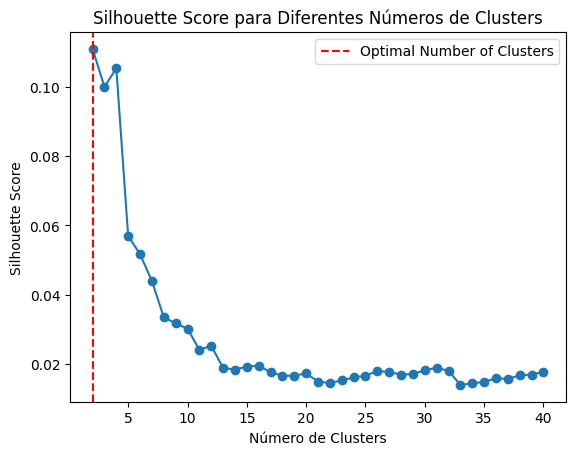

El número óptimo de clusters es: 2


In [43]:
# Rango de número de clusters que deseas probar
min_clusters = 2
max_clusters = 40

# Lista para almacenar los valores de Silhouette Score
silhouette_scores = []

# Probar diferentes números de clusters
for n_clusters in tqdm(range(min_clusters, max_clusters + 1)):
    # Crear el modelo de clustering KMeans
    model_3 = Birch(threshold=0.01, n_clusters=n_clusters)
    # Ajustar el modelo a los datos
    cluster_labels = model_3.fit_predict(X)
    # Calcular el Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Encontrar el número óptimo de clusters
optimal_n_clusters = np.argmax(silhouette_scores) + min_clusters

# Graficar los resultados
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend()
plt.show()

print(f'El número óptimo de clusters es: {optimal_n_clusters}')

## DBSCAN
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** es un algoritmo de clustering que es particularmente útil en ciertos escenarios. Aquí hay algunas situaciones en las que puede ser apropiado utilizar DBSCAN:

- **Clusters de forma arbitraria:** DBSCAN es capaz de detectar clusters de forma arbitraria y no requiere que los clusters sean esféricos o convexos como algunos otros algoritmos de clustering, lo que lo hace adecuado para conjuntos de datos con clusters de formas irregulares.

- **Densidades variables:** DBSCAN es sensible a las densidades de los puntos de datos y puede identificar clusters de densidades variables. Es capaz de detectar clusters densos rodeados de puntos menos densos y puede manejar correctamente conjuntos de datos con regiones de diferentes densidades.

- **Ruido y puntos atípicos:** DBSCAN es capaz de identificar puntos de datos que no pertenecen a ningún cluster como ruido o puntos atípicos. Esto lo hace útil en conjuntos de datos donde hay presencia de ruido o datos atípicos.

- **Tamaño desconocido de clusters:** DBSCAN no requiere especificar el número de clusters de antemano, lo que lo hace adecuado para conjuntos de datos donde el número de clusters es desconocido o variable.

- **Eficiencia computacional:** DBSCAN es computacionalmente eficiente y puede manejar grandes conjuntos de datos, especialmente cuando se utiliza una estructura de datos espacial eficiente como el árbol de búsqueda de vecinos más cercanos (KD-tree).

- **Clusters de densidad variable:** DBSCAN es capaz de detectar clusters de densidad variable, lo que significa que puede manejar conjuntos de datos donde los clusters tienen diferentes niveles de densidad.

En resumen, DBSCAN es útil cuando se trabaja con conjuntos de datos donde los clusters tienen formas irregulares, densidades variables y tamaños desconocidos. Es capaz de detectar clusters de densidad variable y es robusto ante la presencia de ruido y puntos atípicos. Además, es eficiente computacionalmente y puede manejar grandes conjuntos de datos de manera efectiva.

En el algoritmo DBSCAN, la clase -1 generalmente se asigna a los puntos de datos que se consideran ruido o puntos atípicos. Estos son puntos que no pertenecen a ningún cluster identificado por el algoritmo. Cuando DBSCAN asigna una clase de -1 a un punto de datos, significa que el punto no cumple con los criterios de densidad suficiente para ser considerado parte de un cluster, ni está lo suficientemente cerca de ningún punto central para ser considerado parte de un cluster mediante la conectividad directa. Por lo tanto, se clasifica como ruido o como un punto atípico.

**eps**: Este parámetro representa la distancia máxima entre dos muestras para ser consideradas en el mismo vecindario. En otras palabras, es el radio del vecindario alrededor de cada punto. Si la distancia entre dos puntos es menor o igual a eps, se consideran vecinos y se asignan al mismo cluster

In [62]:
l_eps =[2.46,2.465,2.47,2.48,2.49,2.5]
for eps in tqdm(l_eps):
    model_4 = DBSCAN(eps=eps, min_samples=20)
    # fit model and predict clusters
    cluster_labels = model_4.fit_predict(X)
    unique_values, frequencies = np.unique(cluster_labels, return_counts=True)
    print("clusters: ", len(unique_values)-1)
    print("eps: ", eps)
    print(f"Valor: {unique_values[0]}, Frecuencia: {frequencies[0]}")

 12%|█▎        | 1/8 [00:01<00:12,  1.81s/it]

clusters:  15
eps:  2.46
Valor: -1, Frecuencia: 12047


 25%|██▌       | 2/8 [00:03<00:11,  1.85s/it]

clusters:  15
eps:  2.465
Valor: -1, Frecuencia: 12030


 38%|███▊      | 3/8 [00:05<00:09,  1.84s/it]

clusters:  15
eps:  2.47
Valor: -1, Frecuencia: 11985


 50%|█████     | 4/8 [00:07<00:07,  1.88s/it]

clusters:  15
eps:  2.48
Valor: -1, Frecuencia: 11928


 62%|██████▎   | 5/8 [00:09<00:05,  2.00s/it]

clusters:  15
eps:  2.49
Valor: -1, Frecuencia: 11852


 75%|███████▌  | 6/8 [00:12<00:04,  2.17s/it]

clusters:  14
eps:  2.5
Valor: -1, Frecuencia: 11801


 88%|████████▊ | 7/8 [00:14<00:02,  2.19s/it]

clusters:  12
eps:  2.55
Valor: -1, Frecuencia: 11412


100%|██████████| 8/8 [00:16<00:00,  2.11s/it]

clusters:  12
eps:  2.551
Valor: -1, Frecuencia: 11409


## Mean Shift
El algoritmo **Mean Shift** es útil en varios escenarios de clustering, especialmente cuando se trabaja con conjuntos de datos donde los clusters tienen formas y tamaños arbitrarios. Aquí hay algunas situaciones en las que puede ser apropiado utilizar Mean Shift:

- **Clusters de forma arbitraria:** Mean Shift es capaz de detectar clusters de forma arbitraria y no requiere que los clusters sean esféricos, convexos o de densidad uniforme. Esto lo hace adecuado para conjuntos de datos con clusters de formas irregulares y tamaños variables.

- **Densidades variables:** Mean Shift es sensible a las densidades de los puntos de datos y puede identificar clusters de densidades variables. Es capaz de detectar clusters densos rodeados de puntos menos densos y puede manejar correctamente conjuntos de datos con regiones de diferentes densidades.

- **Sin suposiciones sobre la forma de los clusters:** Mean Shift no hace suposiciones específicas sobre la forma de los clusters y puede identificar naturalmente clusters de cualquier forma y tamaño. Esto lo hace adecuado para conjuntos de datos donde la forma y la densidad de los clusters pueden ser desconocidas o variables.

- **Sin necesidad de especificar el número de clusters:** Mean Shift no requiere especificar el número de clusters de antemano, lo que lo hace adecuado para conjuntos de datos donde el número de clusters es desconocido o variable.

- **Alto rendimiento:** Mean Shift es un algoritmo eficiente que puede manejar conjuntos de datos de tamaño moderado a grande en un tiempo razonable. Aunque puede ser más lento que algunos otros algoritmos de clustering, puede producir resultados de alta calidad en un tiempo razonable.

- **Robusto ante ruido:** Mean Shift es robusto ante datos con ruido y puede manejar puntos de datos atípicos o valores atípicos sin afectar significativamente la calidad del clustering.

En resumen, **Mean Shift** es adecuado para conjuntos de datos donde los clusters tienen formas y tamaños arbitrarios y pueden tener densidades variables. Es capaz de detectar clusters de densidad variable y no hace suposiciones específicas sobre la forma de los clusters. Es útil cuando el número de clusters es desconocido o variable y puede manejar conjuntos de datos con presencia de ruido o puntos atípicos.

In [ ]:
l_band_width =[2.46,2.465,2.47,2.48,2.49,2.5]
l_band_width=[1]
for band_width in tqdm(l_band_width):
    model_5 = MeanShift(bandwidth=band_width,cluster_all=False)
    # fit model and predict clusters
    cluster_labels = model_5.fit_predict(X)
    unique_values, frequencies = np.unique(cluster_labels, return_counts=True)
    print("clusters: ", len(unique_values)-1)
    print("eps: ", eps)
    print(f"Valor: {unique_values[0]}, Frecuencia: {frequencies[0]}")

## OPTICS
El algoritmo OPTICS (Ordering Points To Identify the Clustering Structure) es una técnica de clustering basada en densidades que es útil en varios escenarios. Aquí hay algunas situaciones en las que es bueno usar el algoritmo OPTICS:

- **Detección de clusters de forma arbitraria:** OPTICS es capaz de detectar clusters de forma arbitraria y no requiere que los clusters sean esféricos, convexos o de densidad uniforme. Esto lo hace adecuado para conjuntos de datos con clusters de formas irregulares y tamaños variables.

- **Clusters de densidades variables:** OPTICS es sensible a las densidades de los puntos de datos y puede identificar clusters de densidades variables. Es capaz de detectar clusters densos rodeados de puntos menos densos y puede manejar correctamente conjuntos de datos con regiones de diferentes densidades.

- **Sin necesidad de especificar el número de clusters:** Al igual que DBSCAN, OPTICS no requiere especificar el número de clusters de antemano. Esto lo hace adecuado para conjuntos de datos donde el número de clusters es desconocido o variable.

- **Identificación de clusters a diferentes niveles de granularidad:** OPTICS produce un conjunto de ordenamientos (reachability plot) que permite identificar clusters a diferentes niveles de granularidad. Esto proporciona una vista jerárquica de la estructura de clustering en los datos, lo que puede ser útil para el análisis y la interpretación de los resultados.

- **Robusto ante ruido y valores atípicos:** OPTICS es robusto ante datos con ruido y puede manejar puntos de datos atípicos o valores atípicos sin afectar significativamente la calidad del clustering. Además, proporciona una forma de identificar y separar claramente los puntos de ruido.

- **Eficiencia en conjuntos de datos grandes:** OPTICS es eficiente en términos de tiempo y memoria en comparación con algunos otros algoritmos de clustering, especialmente en conjuntos de datos grandes. Sin embargo, el rendimiento puede depender de la implementación específica y el tamaño del conjunto de datos.

En resumen, **OPTICS** es útil cuando se trabaja con conjuntos de datos donde los clusters tienen formas y tamaños arbitrarios, y pueden tener densidades variables. Es capaz de detectar clusters de densidad variable sin la necesidad de especificar el número de clusters de antemano, y proporciona una vista jerárquica de la estructura de clustering en los datos. Además, es robusto ante ruido y valores atípicos, y puede ser eficiente en conjuntos de datos grandes.

In [67]:
l_eps =[1,2,3,4,5]
for eps in tqdm(l_eps):
    model_6 = OPTICS(eps=eps, min_samples=20)
    # fit model and predict clusters
    cluster_labels = model_6.fit_predict(X)
    unique_values, frequencies = np.unique(cluster_labels, return_counts=True)
    print("clusters: ", len(unique_values)-1)
    print("eps: ", eps)
    print(f"Valor: {unique_values[0]}, Frecuencia: {frequencies[0]}")

 20%|██        | 1/5 [04:14<16:57, 254.33s/it]

clusters:  3
eps:  1
Valor: -1, Frecuencia: 13097


 40%|████      | 2/5 [08:27<12:40, 253.46s/it]

clusters:  3
eps:  2
Valor: -1, Frecuencia: 13097


 60%|██████    | 3/5 [12:31<08:18, 249.43s/it]

clusters:  3
eps:  3
Valor: -1, Frecuencia: 13097


 80%|████████  | 4/5 [16:34<04:06, 246.92s/it]

clusters:  3
eps:  4
Valor: -1, Frecuencia: 13097


100%|██████████| 5/5 [20:38<00:00, 247.70s/it]

clusters:  3
eps:  5
Valor: -1, Frecuencia: 13097


100%|██████████| 39/39 [02:23<00:00,  3.68s/it]


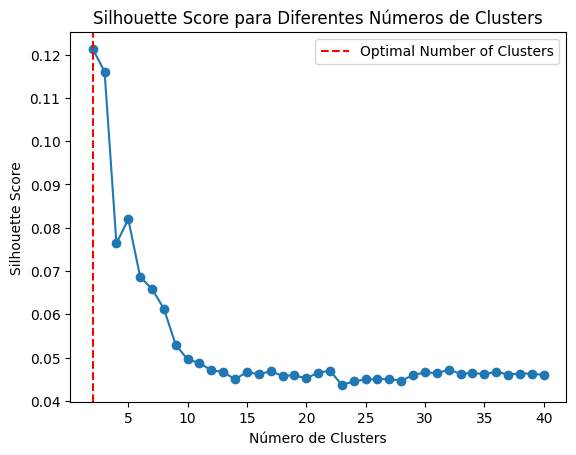

El número óptimo de clusters es: 2


In [577]:
# Generar datos de ejemplo
X = df_questions_marco[l_cols]

# Rango de número de clusters que deseas probar
min_clusters = 2
max_clusters = 40

# Lista para almacenar los valores de Silhouette Score
silhouette_scores = []

# Probar diferentes números de clusters
for n_clusters in tqdm(range(min_clusters, max_clusters + 1)):
    # Crear el modelo de clustering KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    # Ajustar el modelo a los datos
    cluster_labels = kmeans.fit_predict(X)
    # Calcular el Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Encontrar el número óptimo de clusters
optimal_n_clusters = np.argmax(silhouette_scores) + min_clusters

# Graficar los resultados
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend()
plt.show()

print(f'El número óptimo de clusters es: {optimal_n_clusters}')

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:43<00:00,  1.12s/it]


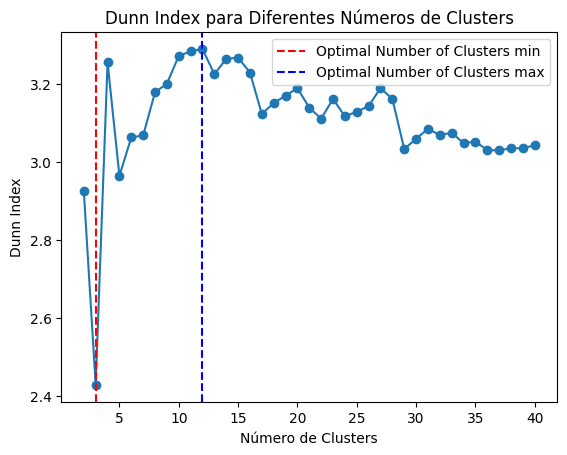

El número óptimo de clusters min es: 3
El número óptimo de clusters max es: 12


In [578]:
# Generar datos de ejemplo
X= df_questions_marco[l_cols]

# Rango de número de clusters que deseas probar
min_clusters = 2
max_clusters = 40

# Lista para almacenar los valores de Dunn Index
dunn_scores = []

# Probar diferentes números de clusters
for n_clusters in tqdm(range(min_clusters, max_clusters + 1)):
    # Crear el modelo de clustering KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    # Ajustar el modelo a los datos
    kmeans.fit(X)
    # Obtener las etiquetas de los clusters
    cluster_labels = kmeans.labels_
    # Calcular la matriz de distancias entre clusters
    pairwise_distances_clusters = pairwise_distances(X[kmeans.labels_ == 0], X[kmeans.labels_ == 1])
    # Calcular el índice de Dunn
    dunn_score = davies_bouldin_score(X, cluster_labels)
    dunn_scores.append(dunn_score)

# Encontrar el número óptimo de clusters
#optimal_n_clusters = np.argmin(dunn_scores) + min_clusters
    
optimal_n_clusters_max = np.argmax(dunn_scores) + min_clusters
optimal_n_clusters_min = np.argmin(dunn_scores) + min_clusters

# Graficar los resultados
plt.plot(range(min_clusters, max_clusters + 1), dunn_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index para Diferentes Números de Clusters')
plt.axvline(x=optimal_n_clusters_min, color='r', linestyle='--', label='Optimal Number of Clusters min')
plt.axvline(x=optimal_n_clusters_max, color='b', linestyle='--', label='Optimal Number of Clusters max')
plt.legend()
plt.show()

print(f'El número óptimo de clusters min es: {optimal_n_clusters_min}')

print(f'El número óptimo de clusters max es: {optimal_n_clusters_max}')

## Genración de cluster
Después de correr varios algoritmos de clustering nos quedaremos con **KMeans**, **DBSCAN**

In [71]:
model_4 = DBSCAN(eps=2.49, min_samples=20)
# fit model and predict clusters
cluster_labels_4 = model_4.fit_predict(X)
unique_values, frequencies = np.unique(cluster_labels_4, return_counts=True)

print("clusters: ", len(unique_values)-1)
print("eps: ", eps)
print(f"Valor: {unique_values[0]}, Frecuencia: {frequencies[0]}")

labels_4 = model_4.labels_

# Calcula los centroides de cada cluster
unique_labels_4 = np.unique(labels_4)
centroids_4 = []
for label in unique_labels_4:
    if label != -1:  # Ignora el ruido (puntos sin asignar a ningún cluster)
        cluster_points = X[labels_4 == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids_4.append(centroid)

clusters:  15
eps:  5
Valor: -1, Frecuencia: 11852


In [73]:
num_clusters = 5
kmeans_5 = KMeans(n_clusters=num_clusters)
kmeans_5.fit(X)

# Obtiene las etiquetas de los clusters y los centroides
labels_5 = kmeans_5.labels_
centroids_5 = kmeans_5.cluster_centers_

In [75]:
labels_5.shape

(13265,)

In [76]:
df_questions_marco['label_4']=labels_4
df_questions_marco['label_5']=labels_5

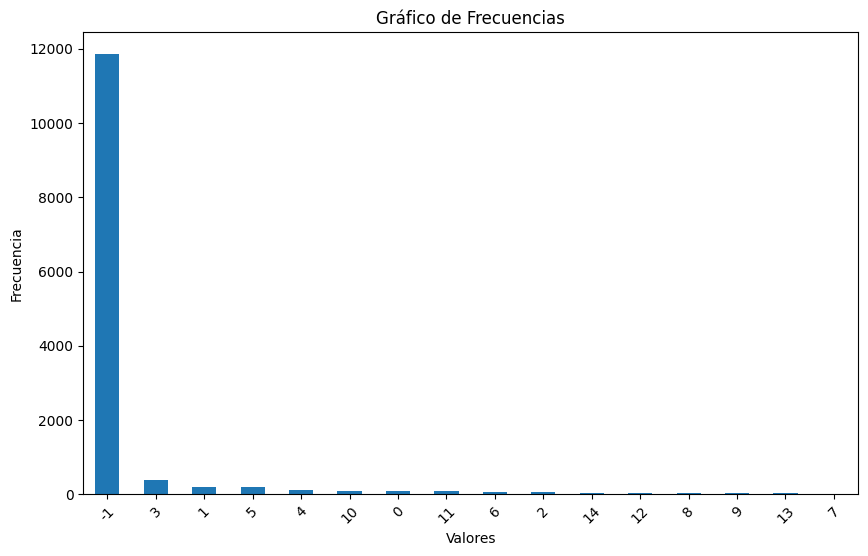

In [77]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
df_questions_marco['label_4'].value_counts().plot(kind='bar')
plt.title('Gráfico de Frecuencias')  # Título del gráfico
plt.xlabel('Valores')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de los ticks en el eje x (opcional)
plt.show()

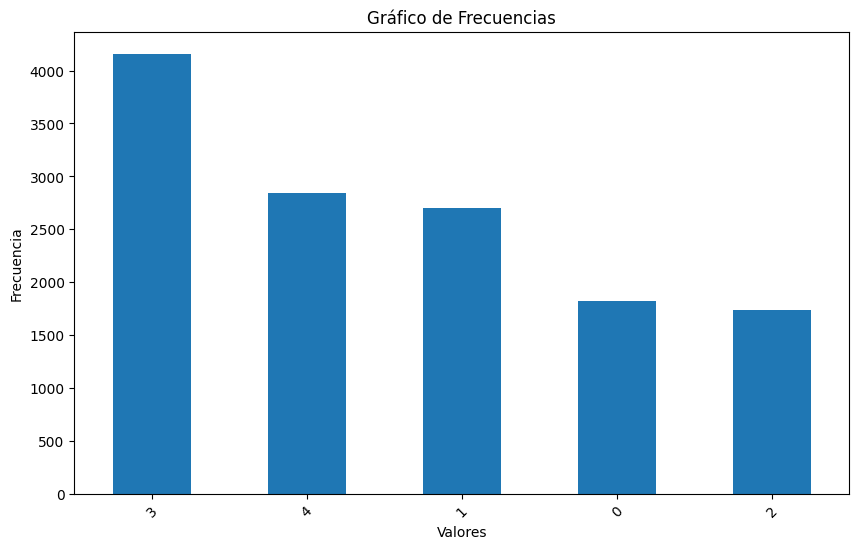

In [78]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
df_questions_marco['label_5'].value_counts().plot(kind='bar')
plt.title('Gráfico de Frecuencias')  # Título del gráfico
plt.xlabel('Valores')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de los ticks en el eje x (opcional)
plt.show()

## Algoritmo LDA
El **algoritmo de Detección de Tópicos Latentes (Latent Dirichlet Allocation - LDA)** es un modelo probabilístico ampliamente utilizado en el campo del Procesamiento del Lenguaje Natural (NLP) para identificar temas latentes en un conjunto de documentos. Fue propuesto por primera vez por David Blei, Andrew Ng y Michael Jordan en 2003.

Aquí hay una descripción básica del algoritmo LDA y cómo funciona:

- **Definición del modelo:** LDA asume que los documentos en un corpus (conjunto de documentos) se generan a partir de una mezcla de tópicos. Cada tópico es una distribución de palabras y define la probabilidad de que una palabra aparezca en un documento dado ese tópico. A su vez, cada documento se considera una mezcla de tópicos, donde la distribución de tópicos para cada documento es única.

- **Asignación de palabras a tópicos:** El objetivo de LDA es inferir la distribución de tópicos para cada documento y la distribución de palabras para cada tópico. El algoritmo utiliza técnicas de inferencia estadística para asignar palabras a tópicos de manera que maximice la probabilidad de que el corpus completo se haya generado a partir de esta asignación.

- **Proceso generativo:** LDA sigue un proceso generativo. Para generar un documento, primero se selecciona una distribución de tópicos para el documento a partir de una distribución de Dirichlet. Luego, para cada palabra en el documento, se selecciona un tópico de acuerdo con esta distribución y luego se elige una palabra de ese tópico.

- **Entrenamiento del modelo:** En el proceso de entrenamiento, LDA ajusta los parámetros del modelo para maximizar la probabilidad de observar los documentos dados los parámetros del modelo. Esto generalmente se hace utilizando técnicas de inferencia variacional o muestreo de Gibbs.

- **Resultados del modelo:** Después de entrenar el modelo, se pueden examinar las distribuciones de tópicos para cada documento y las distribuciones de palabras para cada tópico. Esto permite interpretar y etiquetar los tópicos descubiertos, así como analizar la relación entre los tópicos y los documentos en el corpus.

En resumen, **LDA** es un modelo probabilístico utilizado para descubrir tópicos latentes en un corpus de documentos. Proporciona una forma de estructurar y analizar grandes conjuntos de datos de texto, lo que permite la identificación de patrones y temas importantes dentro de los documentos.

In [79]:
df_topics_4 = df_questions_marco.groupby('label_4')['questions'].agg(lambda x: ', '.join(x)).reset_index()
df_topics_5 = df_questions_marco.groupby('label_5')['questions'].agg(lambda x: ', '.join(x)).reset_index()

In [80]:
import re

#df_topics['paper_text_processed'] = \ 
df_topics_4['questions'].map(lambda x: re.sub('[,\.!?]', '', x))
df_topics_5['questions'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convertir los títulos a minúsculas 
#df_topics['paper_text_processed'] = \ 
df_topics_4['questions'].map(lambda x: x.lower())
df_topics_5['questions'].map(lambda x: x.lower())
 


0    what is the main topic of the document "marco ...
1    how does the document define the concept of "i...
2    what is the file name of the pdf file provided...
3    according to the document, what is the purpose...
4    based on the information provided in the docum...
Name: questions, dtype: object

In [81]:
labels_cluster_4 = df_topics_4['label_4'].values
labels_cluster_5 = df_topics_5['label_5'].values

In [82]:

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [83]:
l_params_lda_4 = []
for label in labels_cluster_4:
    df_topics_label = df_topics_4[df_topics_4['label_4']==label]
    data = df_topics_label.questions.values.tolist()
    data_words = list(sent_to_words(data))
    # remove stop words
    data_words = remove_stopwords(data_words)
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    l_params_lda_4.append((corpus,id2word))

In [84]:
l_params_lda_5 = []
for label in labels_cluster_5:
    df_topics_label = df_topics_5[df_topics_5['label_5']==label]
    data = df_topics_label.questions.values.tolist()
    data_words = list(sent_to_words(data))
    # remove stop words
    data_words = remove_stopwords(data_words)
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    l_params_lda_5.append((corpus,id2word))

In [86]:
from pprint import pprint
# number of topics
num_topics = 1
# Build LDA model


In [87]:
l_doc_lda_4 = []
for label_params in l_params_lda_4:
    lda_model = gensim.models.LdaMulticore(corpus=label_params[0],
                                        id2word=label_params[1],
                                        num_topics=num_topics)
    doc_lda = lda_model[corpus]
    l_doc_lda_4.append(lda_model)

In [88]:
l_doc_lda_5 = []
for label_params in l_params_lda_5:
    lda_model = gensim.models.LdaMulticore(corpus=label_params[0],
                                        id2word=label_params[1],
                                        num_topics=num_topics)
    doc_lda = lda_model[corpus]
    l_doc_lda_5.append(lda_model)

In [89]:
l_rows_data_4 = []
for i in range(len(l_doc_lda_4)):
    for j in range(num_topics):
        
        split_result = re.split(r'[*+]\s*',l_doc_lda_4[i].print_topics()[j][1] )
        split_result =[result.replace('"','') for result in split_result]
        split_result.append(j)
        split_result.append(i)
        l_rows_data_4.append(split_result)        

l_rows_data_5 = []
for i in range(len(l_doc_lda_5)):
    for j in range(num_topics):
        
        split_result = re.split(r'[*+]\s*',l_doc_lda_5[i].print_topics()[j][1] )
        split_result =[result.replace('"','') for result in split_result]
        split_result.append(j)
        split_result.append(i)
        l_rows_data_5.append(split_result) 
    


In [90]:
# Definir el nombre de las columnas
columns = [ 'p_1', 'word_1','p_2', 'word_2','p_3', 'word_3','p_4', 'word_4','p_5', 'word_5','p_6', 'word_6','p_7', 'word_7','p_8', 'word_8','p_9', 'word_9','p_10', 'word_10','topic_num','label']
df_result_topics_4 = pd.DataFrame(columns=columns)
df_result_topics_5 = pd.DataFrame(columns=columns)
columnas_a_convertir = [ 'p_1','p_2','p_3','p_4','p_5','p_6','p_7','p_8','p_9','p_10']
# Asignar las columnas al DataFrame
for i in range(len(l_doc_lda_4)*num_topics):
    df_result_topics_4.loc[i] =l_rows_data_4[i]
for i in range(len(l_doc_lda_5)*num_topics):
    df_result_topics_5.loc[i] =l_rows_data_5[i]

df_result_topics_4[columnas_a_convertir] = df_result_topics_4[columnas_a_convertir].astype(float)   
df_result_topics_5[columnas_a_convertir] = df_result_topics_5[columnas_a_convertir].astype(float) 

In [91]:
df_result_topics_4.to_csv("result_topics_4.csv")
df_result_topics_5.to_csv("result_topics_5.csv")

In [92]:
df_result_topics_4

,p_1,word_1,p_2,word_2,p_3,word_3,p_4,word_4,p_5,word_5,...,p_7,word_7,p_8,word_8,p_9,word_9,p_10,word_10,topic_num,label
0,0.034,health,0.030,document,0.028,healthcare,0.025,system,0.024,according,...,0.016,passage,0.014,author,0.014,quality,0.012,performance,0,0
1,0.079,de,0.059,procesos,0.057,los,0.057,evaluacion,0.052,estrategias,...,0.051,publicos,0.051,privados,0.051,proyecto,0.026,document,0,1
2,0.191,file,0.122,context,0.100,pdf,0.068,information,0.066,mentioned,...,0.046,provided,0.044,date,0.032,type,0.025,creation,0,2
3,0.131,de,0.069,la,0.065,salud,0.064,apoyo,0.064,programa,...,0.039,document,0.031,colombia,0.027,purpose,0.027,relate,0,3
4,0.070,healthcare,0.052,author,0.035,system,0.026,view,0.024,health,...,0.018,potential,0.018,quality,0.016,implications,0.015,role,0,4
5,0.106,de,0.073,marco,0.073,conceptual,0.073,salud,0.073,sistemas,...,0.032,cap,0.020,healthcare,0.020,purpose,0.019,main,0,5
6,0.131,date,0.073,creation,0.068,last,0.068,modified,0.063,document,...,0.041,context,0.031,file,0.026,relate,0.023,healthcare,0,6
7,0.109,pdf,0.109,cap,0.109,file,0.045,document,0.044,according,...,0.042,date,0.030,information,0.025,creation,0.024,relate,0,7
8,0.067,access,0.063,healthcare,0.063,address,0.063,document,0.060,issue,...,0.039,services,0.035,solutions,0.028,potential,0.025,unequal,0,8
9,0.106,document,0.101,according,0.088,healthcare,0.088,system,0.057,colombian,...,0.035,colombia,0.031,financing,0.026,main,0.018,health,0,9


In [93]:
df_result_topics_5

,p_1,word_1,p_2,word_2,p_3,word_3,p_4,word_4,p_5,word_5,...,p_7,word_7,p_8,word_8,p_9,word_9,p_10,word_10,topic_num,label
0,0.066,de,0.039,document,0.022,salud,0.021,healthcare,0.020,according,...,0.017,system,0.016,relate,0.011,purpose,0.010,health,0,0
1,0.037,healthcare,0.036,author,0.034,passage,0.029,health,0.026,system,...,0.023,according,0.021,relate,0.020,document,0.013,systems,0,1
2,0.080,file,0.064,document,0.049,pdf,0.046,context,0.040,date,...,0.032,according,0.028,information,0.022,name,0.021,last,0,2
3,0.041,health,0.039,healthcare,0.033,system,0.021,quality,0.018,document,...,0.011,potential,0.011,care,0.011,systems,0.010,author,0,3
4,0.045,according,0.044,health,0.037,document,0.020,system,0.016,passage,...,0.016,performance,0.014,context,0.014,quality,0.014,purpose,0,4


In [97]:
def crear_nube_palabras(fila):
    # Convertir la fila en un diccionario de palabras y pesos
    datos ={}
    for i in range(0,len(fila)-1,2):
        size_=fila[i]
        word=fila[i+1]
        datos[word]=size_
    # Crear un objeto WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white')


    return wordcloud.generate_from_frequencies(datos)
def graficar_matriz_wordcloud(wordclouds):
    fig, axs = plt.subplots(5, 3, figsize=(20, 20))
    for i, ax in enumerate(axs.flatten()):
        if i < len(wordclouds):
            ax.imshow(wordclouds[i], interpolation='bilinear')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

In [95]:
l_wordclouds_4 = []
for i in range(16):
    fila = df_result_topics_4.iloc[:, :-2].iloc[i]
    #print(df_result_topics['label'].loc[i])
    wordcloud = crear_nube_palabras(fila)
    l_wordclouds_4.append(wordcloud)
l_wordclouds_5 = []
for i in range(5):
    fila = df_result_topics_5.iloc[:, :-2].iloc[i]
    #print(df_result_topics['label'].loc[i])
    wordcloud = crear_nube_palabras(fila)
    l_wordclouds_5.append(wordcloud)

/var/folders/hs/vf4ldkdn15n5w_5y8gj10s0h37drkd/T/ipykernel_2143/3515348735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size_=fila[i]
/var/folders/hs/vf4ldkdn15n5w_5y8gj10s0h37drkd/T/ipykernel_2143/3515348735.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  word=fila[i+1]


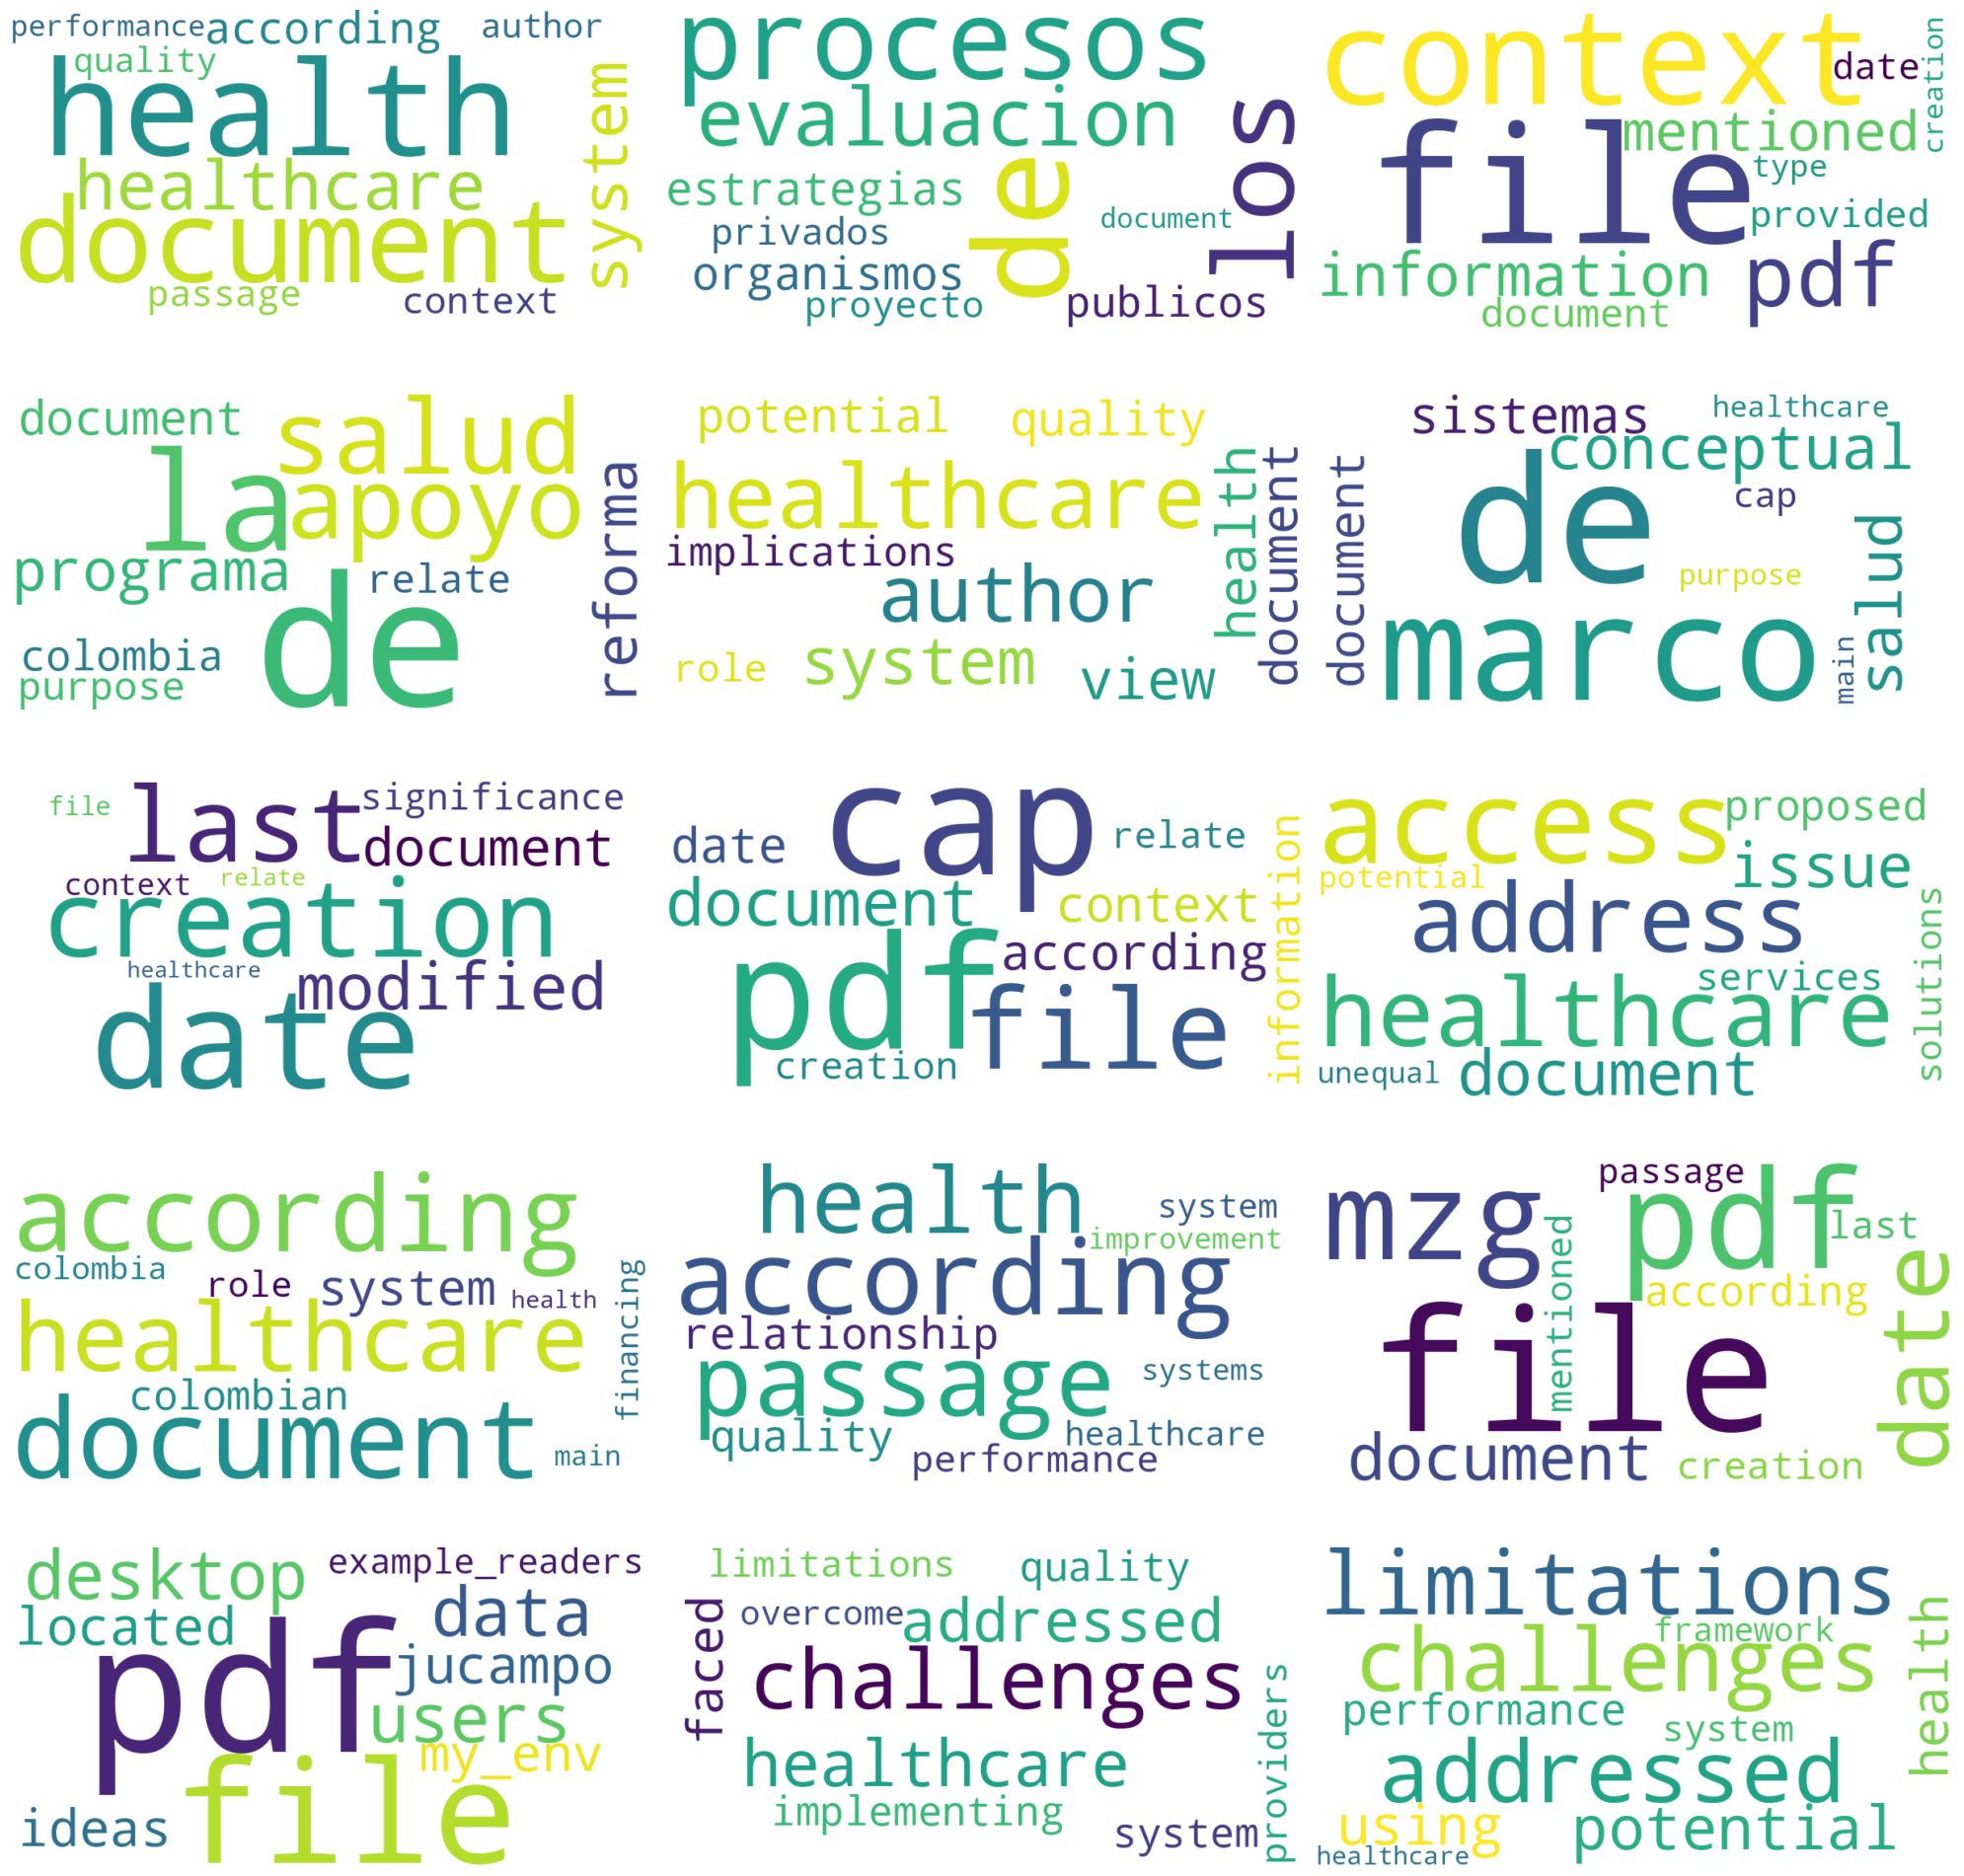

In [98]:
graficar_matriz_wordcloud(l_wordclouds_4)

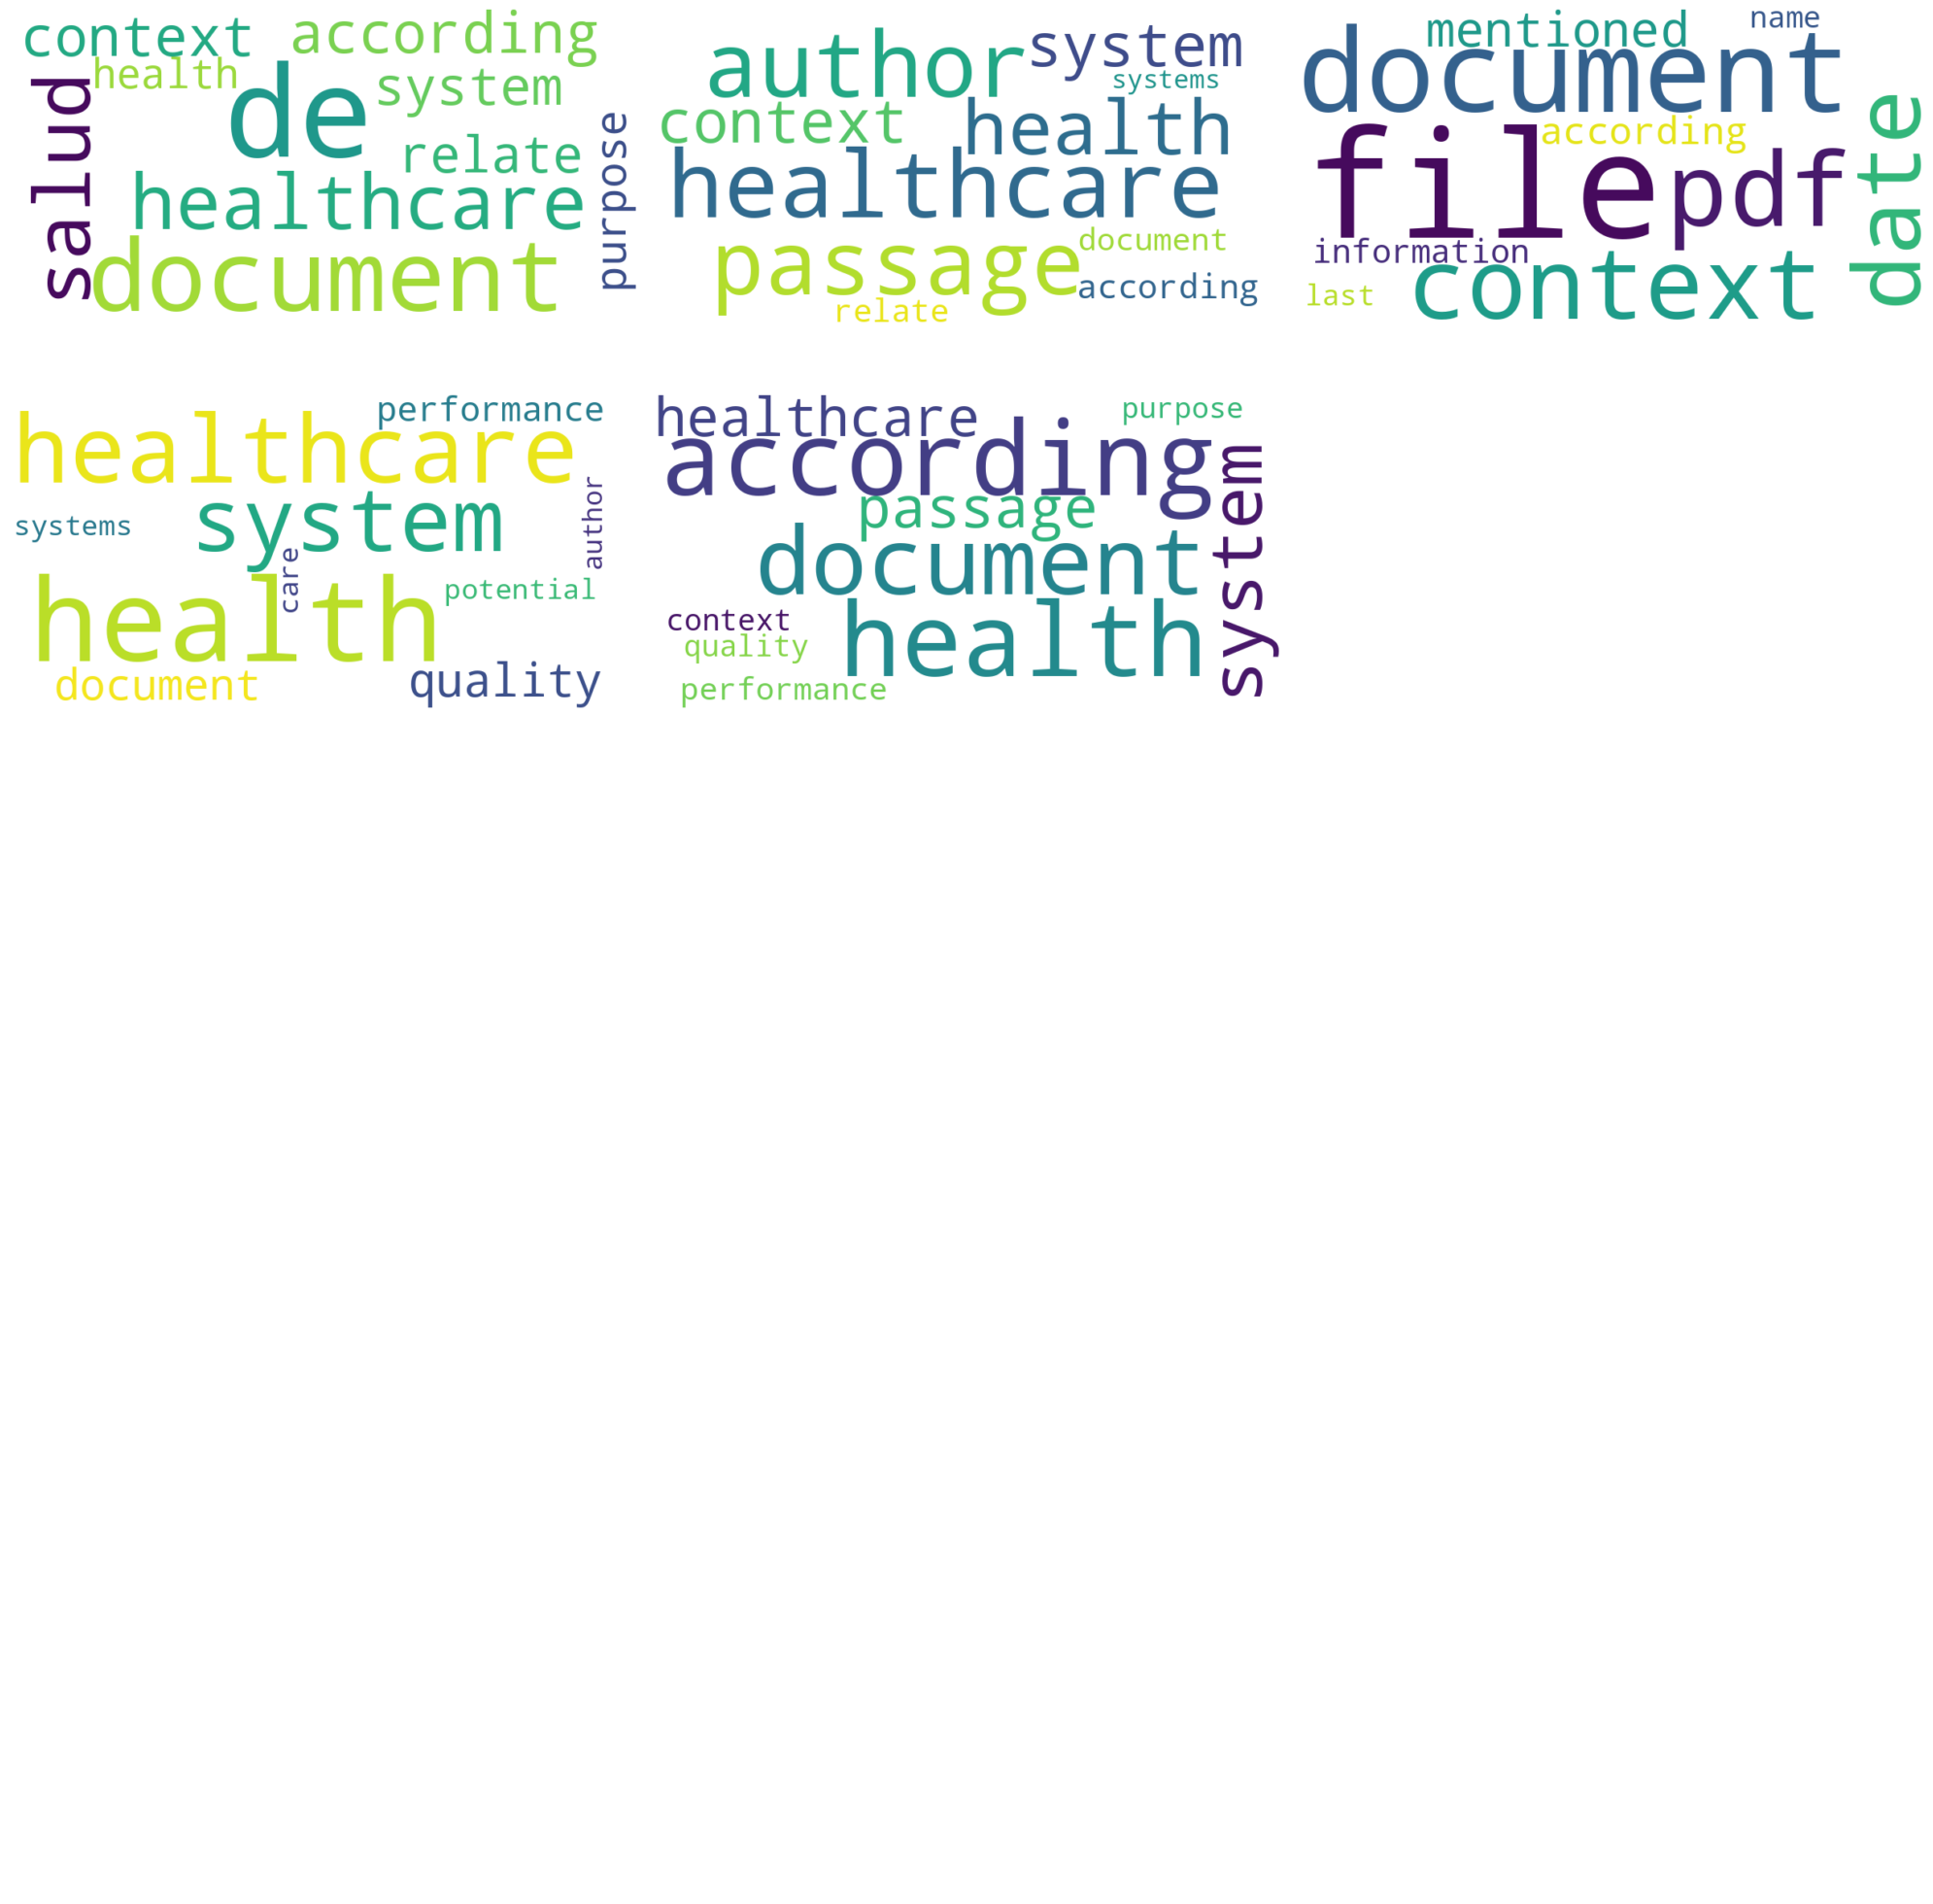

In [99]:
graficar_matriz_wordcloud(l_wordclouds_5)

In [104]:
l_words_ =[11,12]

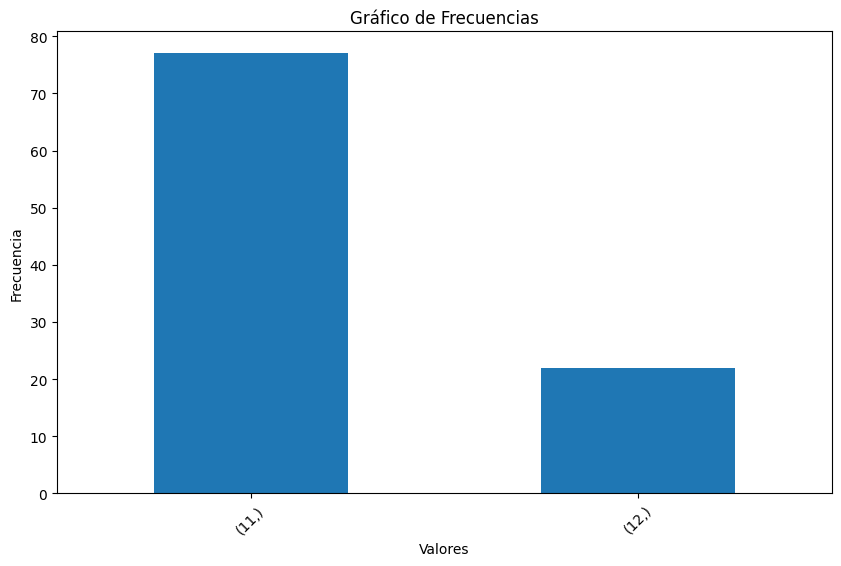

In [105]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
df_questions_marco[df_questions_marco['label_4'].isin(l_words_)][['label_4']].value_counts().plot(kind='bar')
plt.title('Gráfico de Frecuencias')  # Título del gráfico
plt.xlabel('Valores')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de los ticks en el eje x (opcional)
plt.show()

In [106]:
df_centroids_4 = pd.DataFrame(centroids_4,columns=[i for i in range(768)])
df_centroids_4['centroid']=True
df_centroids_4

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,centroid
0,-0.109348,0.095476,-0.120160,0.276997,-0.109447,0.053342,-0.035141,0.198262,0.104374,0.241885,...,0.090167,-0.069556,0.034901,-0.090513,-0.117722,-0.141440,0.335851,-0.328247,-0.127241,True
1,0.249447,-0.127519,0.275513,-0.166644,0.172691,-0.160497,0.171221,0.012007,-0.246744,-0.225903,...,0.087748,-0.129757,-0.154917,-0.056007,0.152002,-0.097040,0.119845,0.193935,0.147914,True
2,-0.113742,-0.041381,-0.161874,0.251851,-0.004842,0.106064,0.069534,0.112378,0.117252,0.077062,...,0.192364,-0.090335,0.083545,-0.139063,-0.003352,-0.081501,0.320122,-0.018519,-0.199598,True
3,0.221488,-0.183267,-0.031443,0.225682,0.292956,-0.142223,0.076317,0.061407,0.206149,-0.104204,...,0.197637,-0.276612,-0.136328,-0.025184,0.017210,-0.195109,0.236336,0.012545,-0.101247,True
4,-0.029415,0.017677,-0.053427,0.230014,0.164011,0.010976,0.055063,0.115596,0.093583,0.111434,...,0.084689,-0.097326,-0.047923,-0.089695,-0.028488,-0.107750,0.296385,0.108847,0.031100,True
5,0.145900,-0.147605,0.131047,0.109447,0.393143,-0.121008,0.175526,0.000475,0.002483,-0.059007,...,0.199681,-0.260322,-0.050106,-0.025323,0.185272,-0.143891,0.125210,0.057134,-0.002946,True
6,0.112628,0.114850,-0.000163,0.060826,0.019661,-0.149239,0.116211,0.181398,0.039395,-0.030652,...,0.084902,-0.308556,-0.154090,-0.050008,-0.252340,-0.152928,0.386846,0.009411,0.268899,True
7,0.229016,-0.199435,-0.064673,0.285808,0.175171,-0.182260,0.075295,0.186613,0.044112,-0.110620,...,0.208376,-0.199717,-0.102478,-0.175262,0.003348,-0.173823,0.311781,-0.026078,-0.145286,True
8,0.020422,-0.322821,-0.060066,0.038635,0.105306,-0.140592,0.104868,0.055612,0.096092,-0.139036,...,0.152565,-0.146028,-0.053869,-0.028490,0.108549,-0.125045,0.181190,-0.046679,-0.162338,True
9,0.197400,-0.187946,-0.053671,0.229747,0.402033,-0.213068,0.005639,-0.012161,0.191645,-0.129254,...,0.160022,-0.316092,-0.126882,0.138509,0.001289,-0.340590,0.166239,-0.088091,-0.123996,True


In [110]:

def get_k_top(lista_arrays,target_array,k):
    distancias = np.array([np.linalg.norm(arr - target_array) for arr in lista_arrays])

    # Encontrar índices de los top k elementos más cercanos
    indices_top_k = np.argsort(distancias)[:k]

    # Seleccionar los top k arrays más cercanos
    return [lista_arrays[i] for i in indices_top_k]
def from_array_to_question(top_k_arrays,df,column_label):
    l_df_results = []
    for vector in top_k_arrays:
        resultado = df[df['embeddings_mean'].apply(lambda x: (x == vector).all())]
        l_df_results.append(resultado[['questions',column_label]].reset_index())
    return l_df_results

Exploración de algunas preguntas

In [108]:
lista_arrays = [vector for vector in df_questions_marco['embeddings_mean'].values]
target_array = centroids_4[11]

top_k_arrays = get_k_top(lista_arrays,target_array,3)

In [111]:
l_df_results = from_array_to_question(top_k_arrays,df_questions_marco,"label_4")

In [118]:
l_df_results[2].loc[0]['questions']

'What is the creation date of the PDF file located at /Users/jucampo/Desktop/Ideas/my_env/data/example_readers/marco_conceptual/mzg049.pdf?'

In [120]:
df_centroids_question = pd.DataFrame()
l_centroids_labels = []
l_question = []

for i in range(len(centroids_4)):
    target_array = centroids_4[i]
    top_k_arrays = get_k_top(lista_arrays,target_array,1)
    l_df_results = from_array_to_question(top_k_arrays,df_questions_marco,"label_4")
    l_centroids_labels.append(i)
    l_question.append(l_df_results[0].loc[0]['questions'])



df_centroids_question['label']=l_centroids_labels
df_centroids_question['question']=l_question

In [121]:
df_centroids_question

,label,question
0,0,"What is the main goal of the ""Proyecto Evaluac..."
1,1,What is the file name of the PDF file mentione...
2,2,How does the document relate to the Programa d...
3,3,What is the author's stance on the use of cost...
4,4,How does the document describe the main purpos...
5,5,What is the significance of the creation date ...
6,6,What is the creation date of the file marco_co...
7,7,How does the document address the issue of une...
8,8,What is the role of service providers in the C...
9,9,What is the relationship between health system...


Voy a puntuar la relevancia de la pregunta cluster según la información que creo que pueda aportar al framework:
- 1 será muy poco relevante,2 mdianamente y 3 altamente relevante

In [125]:
#l_points = [3,3,2,1,3,3,1,3,2,2,1,2,1,3,3,1,3,1,3,3,1,1,3,2,1,2,3,1,2,2,1,2,2,2,3,3,1,2,3,1]
l_points = [3,1,2,3,2,1,1,3,3,3,1,1,3,3,3]
for i in range(10,15):    
    print(df_centroids_question.loc[i]['question'])

What is the creation date of the file mzg049.pdf, according to the document?
What is the file name of the PDF file located at /Users/jucampo/Desktop/Ideas/my_env/data/example_readers/marco_conceptual/mzg049.pdf?
What are some of the challenges faced in implementing quality improvement initiatives in healthcare, and how can these challenges be overcome?
What are some potential challenges or limitations of using the framework to evaluate the effectiveness of health interventions, and how can these be addressed?
What are the key elements of continuous quality improvement, according to the authors of the article "Continuous quality improvement: educating towards a culture of clinical governance" in Qual Health Care?


In [126]:
df_centroids_question['level_question']=l_points

In [127]:
df_centroids_question.to_csv("question_centroids_4.csv")

In [128]:
df_centroids_question_1 = df_centroids_question[df_centroids_question['level_question']==1]

In [130]:
top_k_arrays = get_k_top(lista_arrays,centroids_4[3],5)
l_df_results = from_array_to_question(top_k_arrays,df_questions_marco,"label_4")

In [131]:
l_df_results[1].loc[0]['questions']

"What is the author's opinion on the importance of adequate resources in the healthcare system, and how does it relate to the broader context of healthcare systems?"

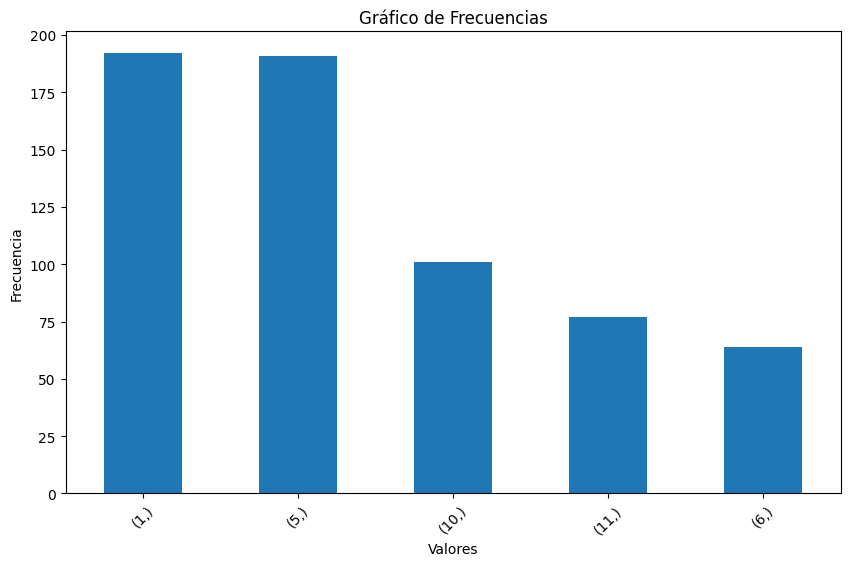

In [133]:
l_words_ = df_centroids_question_1["label"].values
plt.figure(figsize=(10, 6))  # Tamaño de la figura
df_questions_marco[df_questions_marco['label_4'].isin(l_words_)][['label_4']].value_counts().plot(kind='bar')
plt.title('Gráfico de Frecuencias')  # Título del gráfico
plt.xlabel('Valores')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de los ticks en el eje x (opcional)
plt.show()

In [134]:
df_questions_marco_aux = df_questions_marco[["questions","embeddings_mean","label_4"]]

In [153]:
def distancia_euclidiana(array, vector_fijo):
    return np.linalg.norm(array - vector_fijo)
def int_part_sup(float_):
    return math.ceil(float_)

In [212]:
l_df_questions_label = []

for i in tqdm(range(15)):
    q_centroid = df_centroids_question[df_centroids_question["label"]==i].reset_index().loc[0]["question"]
    df_label = df_questions_marco_aux[(df_questions_marco_aux["label_4"]==i)]
    df_label['distance_centroids'] = df_label['embeddings_mean'].apply(lambda x: distancia_euclidiana(x, centroids_4[i]))
    df_label = df_label.sort_values(by='distance_centroids')
    df_label['level'] =df_label['distance_centroids'].apply(int_part_sup)
    df_label = df_label.reset_index(drop=True)
    df_label.loc[0, 'distance_centroids'] = 0
    df_label.loc[0, 'level'] = 0
    l_df_questions_label.append(df_label)

100%|██████████| 15/15 [00:00<00:00, 283.70it/s]


In [213]:
import pickle
# Guardar la lista de DataFrames en un archivo pickle
with open('dataframes_questions_levels.pkl', 'wb') as f:
    pickle.dump(l_df_questions_label, f)


In [214]:
l_df_questions_label[11]

,questions,embeddings_mean,label_4,distance_centroids,level
0,What is the file name of the PDF file located ...,"[0.11214169301092625, -0.0793632506060281, 0.0...",11,0.000000,0
1,What is the name of the PDF file located at /U...,"[0.10822024291211908, -0.06158003922213207, 0....",11,0.837952,1
2,What is the creation date of the PDF file loca...,"[0.08870013819874398, -0.0754312454290422, 0.1...",11,0.842770,1
3,What is the main topic of the PDF file located...,"[0.09562520869076252, -0.08968462873183723, 0....",11,0.855753,1
4,What is the title of the PDF file located at /...,"[0.0750806671651927, -0.060166567005217074, 0....",11,0.879333,1
...,...,...,...,...,...
72,What is the author's perspective on the relati...,"[0.1277919744153495, -0.19221477139160617, 0.1...",11,2.142110,3
73,What is the author's opinion on the World Heal...,"[-0.019061930453110682, -0.21960192423705993, ...",11,2.151262,3
74,What is the file name of the PDF file located ...,"[0.051900579694759204, -0.02891888771508191, 0...",11,2.225537,3
75,What is the size of the PDF file located in th...,"[0.09791077783673394, 0.08485155784505971, 0.0...",11,2.255732,3


## Depuración de clusters
* En esta sección limpiaremos los clusters de preguntas que son respecto a la locación de los archivos, fechas o nombres puntuales, pero que no aportarán al análisis de la reforma de salud

## Construcción de funciones de selección
- **Aleatoria:** selecciona de manera aleatoria de cada cluster una pregunta y genera un top 15 de preguntas aleatorias
- **Nivel fijo:** seleccionamos un nivel (nivel de proximidad respecto al centro del cluster) y seleccionamos la n-ésima pregunta mas cercana perteneciente a un nivel para cada cluster y así generar el top 15 de preguntas
- **Nivel aleatorio:** Seleccionamos de cada cluster un nivel aleatorio y y seleccionamos la n-ésima pregunta mas cercana 
- **Nivel manual:** Se proporciona un diccionario con el label del cluster como clave y el valor será a su vez un diccionario con 2 claves y valores uno para el nivel y otro para indicar el n de la n-ésima pregunta más cercana.
  

In [266]:
def get_random_question(l_df):
    df_result_question = pd.DataFrame()
    for df in l_df:
        row_random = random.randint(0, len(l_df))
        df_question = df.iloc[row_random].to_frame().transpose()
        df_result_question=pd.concat([df_result_question,df_question])
    return df_result_question.reset_index(drop=True)
def get_fixed_level(l_df,level,n_level):
    df_result_question = pd.DataFrame()
    for df in l_df:
        df_level = df[df["level"]==level]
        df_level = df_level.reset_index(drop=True)
        if len(df_level)>=n_level:
            df_question = df_level.iloc[n_level].to_frame().transpose()
        else:
            df_question = df_level.iloc[-1].to_frame().transpose()
        df_result_question=pd.concat([df_result_question,df_question])
    return df_result_question.reset_index(drop=True)

def get_random_level(l_df,n_level):
    df_result_question = pd.DataFrame()
    for df in l_df:
        levels = df['level'].unique().tolist()
        random_level = random.choice(levels)

        df_level = df[df["level"]==random_level]
        df_level = df_level.reset_index(drop=True)

        if len(df_level)>=n_level:
            df_question = df_level.iloc[n_level-1].to_frame().transpose()
        else:
            df_question = df_level.iloc[-1].to_frame().transpose()
        df_result_question=pd.concat([df_result_question,df_question])
    return df_result_question.reset_index(drop=True)
def get_manual_level(l_df,dict_levels):
    df_result_question = pd.DataFrame()
    for i in range(len(l_df)):
        k=1
        df = l_df[i]
        n_level = dict_levels[i]['n_level']
        manual_level = dict_levels[i]["level"]
        df_level = df[df["level"]==manual_level]
        while len(df_level)==0:
            print("buscando nivel ...")
            df_level = df[df["level"]==manual_level-k]
            k+=1
        df_level = df_level.reset_index(drop=True)

        if len(df_level)>=n_level:
            df_question = df_level.iloc[n_level-1].to_frame().transpose()
        else:
            df_question = df_level.iloc[-1].to_frame().transpose()
        df_result_question=pd.concat([df_result_question,df_question])
    return df_result_question.reset_index(drop=True)

## Prueba de las funciones

* **Aleatoria**

In [250]:
get_random_question(l_df_questions_label)

,questions,embeddings_mean,label_4,distance_centroids,level
0,How does the document describe the overall goa...,"[-0.14403923873656563, 0.06059820504326906, -0...",0,1.085681,2
1,What is the file name of the PDF document prov...,"[0.24610775732435286, -0.22775144723709673, 0....",1,1.658854,2
2,"What is the creation date of the document, and...","[-0.09986563376151025, 0.02470045190420933, -0...",2,1.77525,2
3,What is the author's opinion on the impact of ...,"[0.22375201567302686, -0.050282667919590664, -...",3,2.009169,3
4,"What is the main purpose of the document ""Marc...","[-0.046064781459669274, -0.007251293584704399,...",4,1.980975,2
5,What is the significance of the creation date ...,"[0.11811633898566166, -0.22458665582040946, 0....",5,1.850073,2
6,What is the significance of the creation date ...,"[0.0832562165897946, 0.14944931033045747, 0.04...",6,1.062808,2
7,How does the document address the issue of cos...,"[0.15255945985731872, -0.14072979265904945, -0...",7,2.041362,3
8,How does the demand for healthcare services af...,"[-0.000584186905104181, -0.26242404309627804, ...",8,1.873806,2
9,What is the relationship between health system...,"[0.265702404640615, -0.16552839819341897, 0.02...",9,0.0,0


* **Nivel fijo** 

In [251]:
get_fixed_level(l_df_questions_label,2,3)

,questions,embeddings_mean,label_4,distance_centroids,level
0,How do the mechanisms mentioned in the documen...,"[-0.07523810347685447, 0.11444371297525671, -0...",0,1.088904,2
1,What is the file name of the PDF document prov...,"[0.24610775732435286, -0.22775144723709673, 0....",1,1.658854,2
2,What is the purpose of the Programa de Apoyo a...,"[-0.07319698841651766, -0.10637367984688864, -...",2,1.530508,2
3,What is the author's position on the relations...,"[0.16202743230639277, -0.09692060806461282, -0...",3,1.927308,2
4,"What is the purpose of the document ""Marco Con...","[-0.06199828894050033, 0.018126997199875337, -...",4,1.754932,2
5,What is the significance of the creation date ...,"[0.007992888035784875, -0.0811866805223482, -0...",5,1.788709,2
6,"What is the file size of the document ""marco_c...","[0.07732010262495861, 0.10664789471775293, 0.0...",6,1.083124,2
7,How does the document address the issue of acc...,"[0.2197064451008503, -0.23929966553779586, 0.0...",7,1.640263,2
8,What is the principle guiding the financing of...,"[-0.09032366424798965, -0.30537187978625296, -...",8,1.776099,2
9,What is the conceptual basis of health and hea...,"[0.22616342964925265, -0.20828920504764506, 0....",9,1.764589,2


* **Nivel aleatorio**

In [265]:
get_random_level(l_df_questions_label,5)

,questions,embeddings_mean,label_4,distance_centroids,level
0,What is the purpose of the Proyecto Evaluación...,"[-0.016660697108437848, -0.042176360004516536,...",0,2.392986,3
1,"What is the file path of the document, accordi...","[0.2694730680366909, -0.1195238865222092, 0.30...",1,3.10063,4
2,How does the document relate to the Programa d...,"[-0.08226902235412237, -0.011194871061227539, ...",2,0.0,0
3,What is the author's opinion on the use of tec...,"[0.3330447221485277, -0.15067023982604344, -0....",3,2.016475,3
4,"What is the purpose of the ""Marco Conceptual d...","[-0.06461588428779082, 0.03885439707135612, -0...",4,2.040874,3
5,"What is the creation date of the document, as ...","[0.12085525932557442, -0.20087533707127853, 0....",5,3.137486,4
6,What is the creation date of the file marco_co...,"[0.15291431257501245, 0.12463520932942629, 0.0...",6,0.0,0
7,How does the author propose addressing the cha...,"[0.20232827526827654, -0.11531672338467269, -0...",7,2.288234,3
8,What is the role of different government agenc...,"[0.01791500858962536, -0.2788516871388192, -0....",8,2.299617,3
9,What is the relationship between the use of PI...,"[0.28301494143903255, -0.15226855009794235, -0...",9,1.820577,2


In [267]:
dict_levels ={0:{"level":2,"n_level":5},
              1:{"level":2,"n_level":3},
              2:{"level":3,"n_level":4},
              3:{"level":1,"n_level":8},
              4:{"level":1,"n_level":4},
              5:{"level":3,"n_level":4},
              6:{"level":2,"n_level":4},
              7:{"level":2,"n_level":4},
              8:{"level":2,"n_level":4},
              9:{"level":3,"n_level":4},
              10:{"level":2,"n_level":3},
              11:{"level":1,"n_level":4},
              12:{"level":2,"n_level":2},
              13:{"level":3,"n_level":4},
              14:{"level":3,"n_level":1}}
get_manual_level(l_df_questions_label,dict_levels)

buscando nivel ...
buscando nivel ...


,questions,embeddings_mean,label_4,distance_centroids,level
0,"What is the purpose of the ""proyecto Evaluació...","[-0.15004451803089874, 0.12246947131066951, -0...",0,1.099061,2
1,What is the file name of the PDF file provided...,"[0.27118190158815947, -0.1709007470704177, 0.3...",1,1.619066,2
2,What is the difference between the direct and ...,"[-0.008441144210654635, 0.006487490782557532, ...",2,2.05616,3
3,What is the author's stance on the use of cost...,"[0.1691033255986192, -0.18258675001561642, -0....",3,0.0,0
4,How does the document describe the main purpos...,"[-0.09942214165268273, 0.044726147669656525, -...",4,0.0,0
5,What is the significance of the creation date ...,"[0.11936342467864354, -0.2299145571887493, 0.1...",5,2.052328,3
6,"What is the file size of the document ""marco_c...","[0.07732010262495861, 0.10664789471775293, 0.0...",6,1.083124,2
7,How does the document address the issue of acc...,"[0.2197064451008503, -0.23929966553779586, 0.0...",7,1.640263,2
8,What is the principle guiding the financing of...,"[-0.09032366424798965, -0.30537187978625296, -...",8,1.776099,2
9,What is the main objective of health system pe...,"[0.17445106116226977, -0.10636419399331014, 0....",9,2.124305,3


## Análisis de distancias maximas y mínimas

In [512]:
l_df_questions_label[0]["distance_centroids"].max()

,questions,embeddings_mean,cluster_label,distance_centroids,level
1465,What are the externalities mentioned in the do...,"[0.2690203762799501, -0.22869060546159745, -0....",0,1.874490,0
6625,What are the additional characteristics of qua...,"[0.11917710878575842, -0.29976337775588036, 0....",0,1.911354,0
8854,What are the two types of equity mentioned in ...,"[0.22001277857684884, -0.21142516131031103, 0....",0,1.998765,0
2349,How does the document view the relationship be...,"[0.2994776193339091, -0.29388203378766775, -0....",0,2.015837,0
745,What are the three key principles of a healthc...,"[0.16757313594702752, -0.2781798169016838, 0.0...",0,2.035636,0
...,...,...,...,...,...
10641,What are the two main types of health systems ...,"[0.31895907789182204, -0.17751874746038362, -0...",0,3.604366,4
9884,What are the main types of healthcare systems ...,"[0.19929464270050326, -0.303923725305746, -0.1...",0,3.722158,4
9571,"What are the three tiers of the framework, and...","[0.5816782205587342, 0.051890390614668526, -0....",0,3.793223,4
12918,"What is the purpose or goal of the document, a...","[0.2856617115792774, -0.15078232934077582, -0....",0,3.801001,4


In [142]:
def grafico_frecuencias(texto):
    # Tokenizar el texto en palabras
    palabras = word_tokenize(texto)
    
    # Calcular la frecuencia de cada palabra
    frecuencia = FreqDist(palabras)
    
    # Obtener las palabras más comunes y sus frecuencias
    palabras_comunes = frecuencia.most_common(30)
    palabras, frecuencias = zip(*palabras_comunes)
    
    # Generar el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(palabras, frecuencias, color='skyblue')
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.title('Frecuencia de palabras más comunes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def quitar_stopwords(texto):
    # Tokenizar el texto en palabras
    palabras = texto.split()
    
    # Obtener la lista de stop words en inglés
    stop_words = set(stopwords.words('english'))
    print(stop_words)

    stop_words.add('?')
    stop_words.add(',')
    
    # Filtrar las palabras que no están en la lista de stop words
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stop_words]
    
    # Unir las palabras filtradas en un solo string
    texto_filtrado = ' '.join(palabras_filtradas)
    
    return texto_filtrado

{'an', 'didn', 'in', 'itself', 'own', 'has', 'him', 'while', 'them', 'll', 'don', "shouldn't", 'does', 'then', 'should', 'its', 'mustn', "that'll", 'won', 'until', 'be', 'above', 'on', 'was', 'y', 'once', 'herself', 'any', "you've", 'if', 're', 'do', 'during', 'below', 'which', 'been', 'd', 'where', "couldn't", 'such', 'wasn', 'me', 'same', 'for', 'can', "mustn't", "shan't", 'only', 'weren', "you'd", 'hers', 'are', 'm', 'they', 'he', 'ma', 'the', 'again', 'very', "mightn't", 'his', 'being', 'these', 'of', 'with', "you'll", 'had', 'what', 'off', 'our', 'aren', 'yourselves', 'doing', 'not', 'whom', 'you', 'it', 'about', 'too', 'hasn', 'than', 'out', "doesn't", 'having', 'how', 'her', 'needn', 'am', 'did', 'have', 'to', 'down', 'or', 'mightn', "wouldn't", 'further', 'after', 'couldn', 've', 'your', 'as', 'both', "aren't", 'shan', 'were', 'by', 'just', 'here', "won't", 'my', 'yours', 'this', 'few', "isn't", 'ain', 'most', 'shouldn', 'isn', "hasn't", 'under', 'wouldn', 'a', 'from', 'nor', '

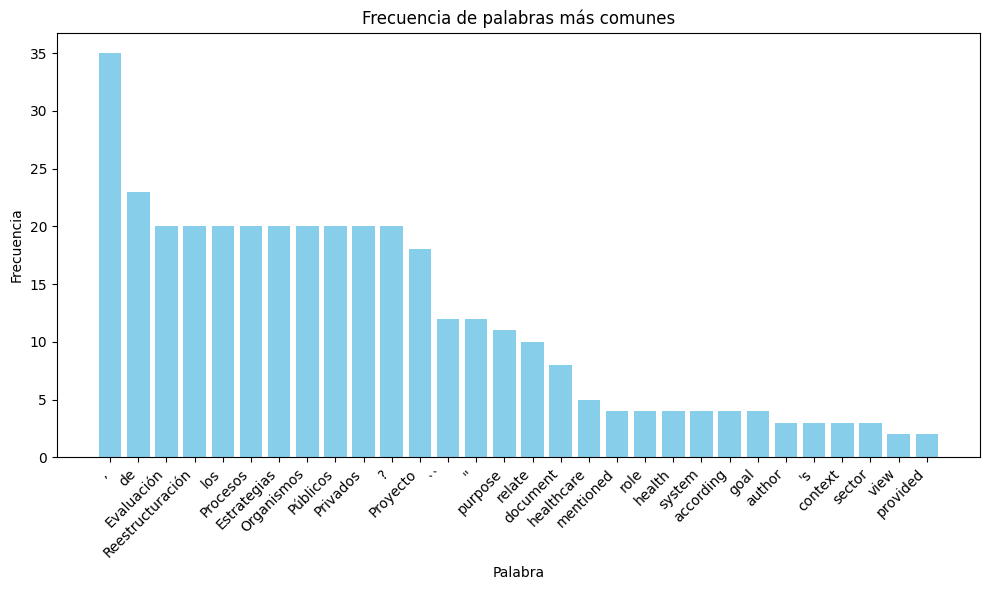

In [143]:
# Texto de ejemplo
texto = resultado = ' '.join(df_question_label_0_0['questions'])
texto = quitar_stopwords(texto)
# Generar el gráfico de barras de frecuencias
grafico_frecuencias(texto)

{'yours', "couldn't", "needn't", 'ourselves', 'and', 'm', 'down', "shan't", 'won', 'few', 'if', 'did', 'same', 'hasn', 'now', "she's", 'by', 'y', 'we', 'be', 'will', "you'd", 'had', 'hers', 'each', 'shan', 'those', 'what', 'isn', 'aren', 'doesn', 'their', 'once', 'couldn', 'a', 'why', 'i', 'while', 'the', 'because', 'any', 'or', 'as', "doesn't", 've', 'then', 'me', "you're", 'your', 'them', 'are', "mustn't", "didn't", 'itself', 'you', 'she', 'above', 'd', 'o', 'himself', 'about', 'can', 'which', 'very', 'such', 'at', 'more', "shouldn't", 'in', "hadn't", 'don', 'but', 'through', 'he', 'from', 'out', 'does', 'being', 's', 'shouldn', 'him', 'where', 'than', 'too', 'hadn', 'herself', 'for', 'mightn', 'how', 'ma', 'there', 'our', 'against', 'before', "isn't", 'doing', 'theirs', "won't", 'to', 'between', 'needn', "aren't", 'been', 'under', 'further', 'mustn', "weren't", 'on', 'should', 're', "mightn't", 'were', 'whom', 'all', 'this', "haven't", 'is', 'other', 'only', "don't", 'haven', 'into'

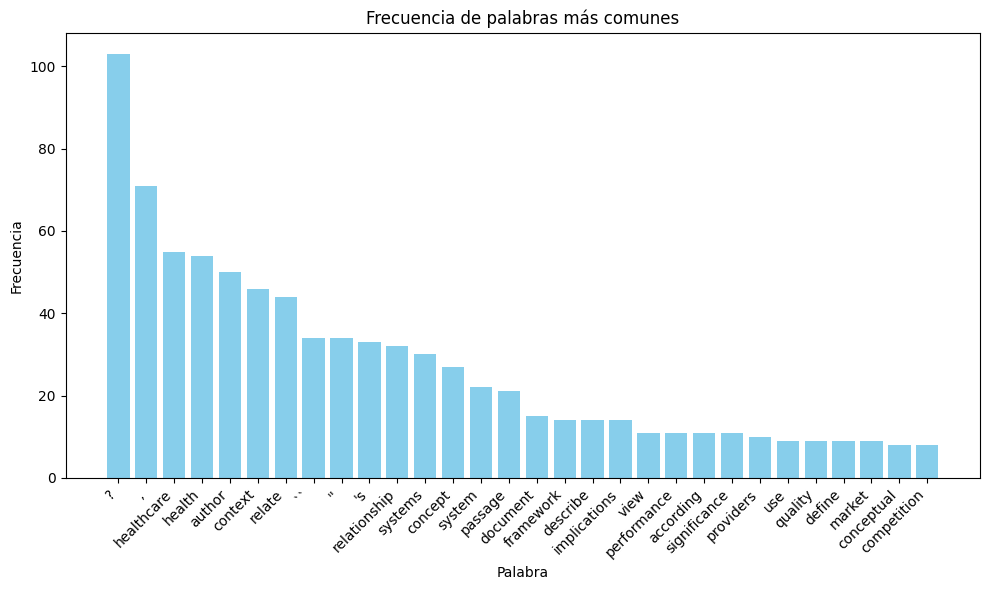

In [413]:
# Texto de ejemplo
texto = resultado = ' '.join(df_question_label_0_0['questions'])
texto = quitar_stopwords(texto)
# Generar el gráfico de barras de frecuencias
grafico_frecuencias(texto)

{'yours', "couldn't", "needn't", 'ourselves', 'and', 'm', 'down', "shan't", 'won', 'few', 'if', 'did', 'same', 'hasn', 'now', "she's", 'by', 'y', 'we', 'be', 'will', "you'd", 'had', 'hers', 'each', 'shan', 'those', 'what', 'isn', 'aren', 'doesn', 'their', 'once', 'couldn', 'a', 'why', 'i', 'while', 'the', 'because', 'any', 'or', 'as', "doesn't", 've', 'then', 'me', "you're", 'your', 'them', 'are', "mustn't", "didn't", 'itself', 'you', 'she', 'above', 'd', 'o', 'himself', 'about', 'can', 'which', 'very', 'such', 'at', 'more', "shouldn't", 'in', "hadn't", 'don', 'but', 'through', 'he', 'from', 'out', 'does', 'being', 's', 'shouldn', 'him', 'where', 'than', 'too', 'hadn', 'herself', 'for', 'mightn', 'how', 'ma', 'there', 'our', 'against', 'before', "isn't", 'doing', 'theirs', "won't", 'to', 'between', 'needn', "aren't", 'been', 'under', 'further', 'mustn', "weren't", 'on', 'should', 're', "mightn't", 'were', 'whom', 'all', 'this', "haven't", 'is', 'other', 'only', "don't", 'haven', 'into'

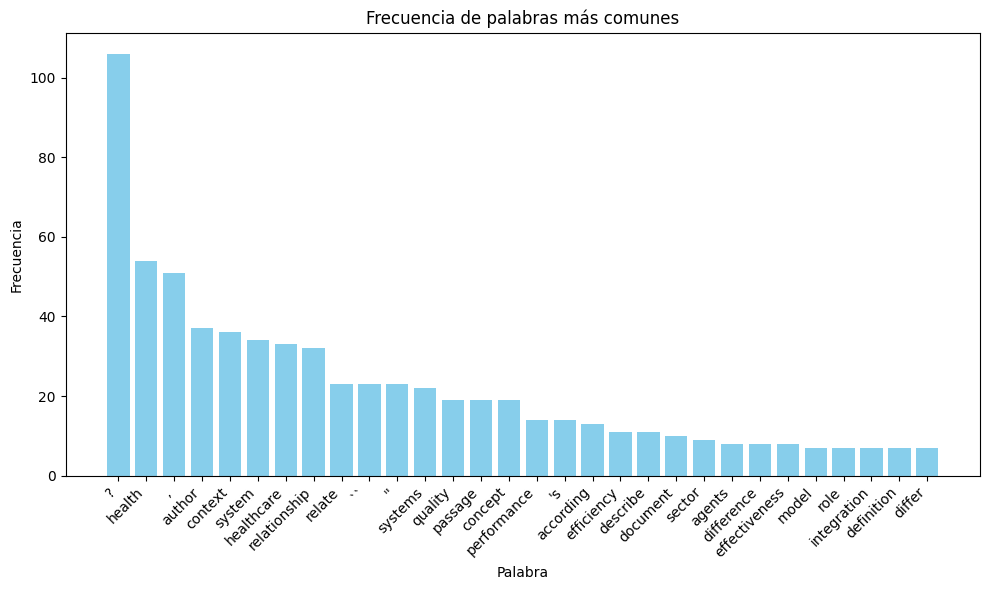

In [416]:
# Texto de ejemplo
texto = resultado = ' '.join(df_question_label_0_0['questions'])
texto = quitar_stopwords(texto)
# Generar el gráfico de barras de frecuencias
grafico_frecuencias(texto)

In [148]:
l_max_min = []
for i in range(15):
    min = l_df_questions_label[i]["distance_centroids"].min()
    max = l_df_questions_label[i]["distance_centroids"].max()
    l_max_min.append(max-min)

In [149]:
pd.Series(l_max_min).max()

2.142818364241224

In [150]:
pd.Series(l_max_min).min()

0.8231772256360583

## Entity recognition

In [450]:
from transformers import pipeline

token_classifier = pipeline(
  "token-classification",
  "dbmdz/bert-large-cased-finetuned-conll03-english",
  grouped_entities=True,
)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/jucampo/Desktop/Ideas/my_env/lib/python3.11/site-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [457]:
def entity_recog(sentence):
  l_result_entity = token_classifier(
    sentence
    )
  for dict_result in l_result_entity:
    start = dict_result['start']
    end = dict_result['end']
    token = sentence[start:end]
    dict_result['token']=token
  return l_result_entity

In [500]:
dict_result_all ={}
count=0
for df in l_df_questions_label:
    df = df.reset_index()
    for i in tqdm(range(len(df))):
        sentence = df.loc[i]["questions"]
        if len(entity_recog(sentence))!=0:
        
            dict_result_all[count]=entity_recog(sentence)
    count+=1
    print(count)
    print('__________')

  0%|          | 0/421 [00:00<?, ?it/s]

100%|██████████| 421/421 [01:05<00:00,  6.42it/s]


1
__________


100%|██████████| 445/445 [01:10<00:00,  6.31it/s]


2
__________


100%|██████████| 120/120 [00:41<00:00,  2.90it/s]


3
__________


100%|██████████| 108/108 [00:15<00:00,  6.90it/s]


4
__________


100%|██████████| 279/279 [00:43<00:00,  6.36it/s]


5
__________


100%|██████████| 567/567 [02:41<00:00,  3.52it/s]


6
__________


100%|██████████| 209/209 [00:35<00:00,  5.96it/s]


7
__________


100%|██████████| 320/320 [00:51<00:00,  6.19it/s]


8
__________


100%|██████████| 470/470 [01:25<00:00,  5.48it/s]


9
__________


100%|██████████| 368/368 [00:54<00:00,  6.77it/s]


10
__________


100%|██████████| 255/255 [01:01<00:00,  4.16it/s]


11
__________


100%|██████████| 332/332 [00:53<00:00,  6.17it/s]


12
__________


100%|██████████| 131/131 [00:27<00:00,  4.68it/s]


13
__________


100%|██████████| 380/380 [01:06<00:00,  5.72it/s]


14
__________


100%|██████████| 617/617 [01:52<00:00,  5.49it/s]


15
__________


100%|██████████| 274/274 [01:02<00:00,  4.40it/s]


16
__________


100%|██████████| 281/281 [00:42<00:00,  6.63it/s]


17
__________


100%|██████████| 155/155 [00:20<00:00,  7.41it/s]


18
__________


100%|██████████| 278/278 [01:04<00:00,  4.28it/s]


19
__________


100%|██████████| 427/427 [01:58<00:00,  3.61it/s]


20
__________


100%|██████████| 503/503 [01:12<00:00,  6.95it/s]


21
__________


100%|██████████| 215/215 [00:28<00:00,  7.61it/s]


22
__________


100%|██████████| 339/339 [00:47<00:00,  7.13it/s]


23
__________


100%|██████████| 251/251 [00:38<00:00,  6.53it/s]


24
__________


100%|██████████| 198/198 [00:30<00:00,  6.50it/s]


25
__________


100%|██████████| 281/281 [01:11<00:00,  3.94it/s]


26
__________


100%|██████████| 272/272 [00:50<00:00,  5.37it/s]


27
__________


100%|██████████| 240/240 [00:32<00:00,  7.33it/s]


28
__________


100%|██████████| 332/332 [00:45<00:00,  7.23it/s]


29
__________


100%|██████████| 387/387 [00:50<00:00,  7.62it/s]


30
__________


100%|██████████| 85/85 [00:20<00:00,  4.24it/s]


31
__________


100%|██████████| 354/354 [00:47<00:00,  7.39it/s]


32
__________


100%|██████████| 755/755 [02:20<00:00,  5.39it/s]


33
__________


100%|██████████| 433/433 [01:02<00:00,  6.96it/s]


34
__________


100%|██████████| 385/385 [01:31<00:00,  4.20it/s]


35
__________


100%|██████████| 370/370 [01:12<00:00,  5.12it/s]


36
__________


100%|██████████| 253/253 [00:56<00:00,  4.50it/s]


37
__________


100%|██████████| 447/447 [01:08<00:00,  6.55it/s]


38
__________


100%|██████████| 426/426 [01:07<00:00,  6.28it/s]


39
__________


100%|██████████| 302/302 [01:14<00:00,  4.05it/s]

40
__________


In [501]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline

model_name = "QCRI/bert-base-multilingual-cased-pos-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)



tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

Some weights of the model checkpoint at QCRI/bert-base-multilingual-cased-pos-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'DT', 'score': 0.9997243, 'index': 1, 'word': 'A', 'start': 0, 'end': 1}, {'entity': 'NN', 'score': 0.9997472, 'index': 2, 'word': 'test', 'start': 2, 'end': 6}, {'entity': 'NN', 'score': 0.99973196, 'index': 3, 'word': 'example', 'start': 7, 'end': 14}]


In [507]:
pipeline = TokenClassificationPipeline(model=model, tokenizer=tokenizer)
outputs = pipeline(l_df_questions_label[0].reset_index().loc[0]['questions'])
print(outputs)

[{'entity': 'WP', 'score': 0.99821717, 'index': 1, 'word': 'What', 'start': 0, 'end': 4}, {'entity': 'VBP', 'score': 0.9985311, 'index': 2, 'word': 'are', 'start': 5, 'end': 8}, {'entity': 'DT', 'score': 0.9998565, 'index': 3, 'word': 'the', 'start': 9, 'end': 12}, {'entity': 'NNS', 'score': 0.99958056, 'index': 4, 'word': 'external', 'start': 13, 'end': 21}, {'entity': 'NNS', 'score': 0.999566, 'index': 5, 'word': '##ities', 'start': 21, 'end': 26}, {'entity': 'VBN', 'score': 0.9913862, 'index': 6, 'word': 'mentioned', 'start': 27, 'end': 36}, {'entity': 'IN', 'score': 0.99979395, 'index': 7, 'word': 'in', 'start': 37, 'end': 39}, {'entity': 'DT', 'score': 0.99987054, 'index': 8, 'word': 'the', 'start': 40, 'end': 43}, {'entity': 'NN', 'score': 0.99982834, 'index': 9, 'word': 'document', 'start': 44, 'end': 52}, {'entity': ',', 'score': 0.9999366, 'index': 10, 'word': ',', 'start': 52, 'end': 53}, {'entity': 'CC', 'score': 0.99971503, 'index': 11, 'word': 'and', 'start': 54, 'end': 57

label                                                             0
question          What are the externalities mentioned in the do...
level_question                                                    3
Name: 0, dtype: object

In [510]:
pipeline = TokenClassificationPipeline(model=model, tokenizer=tokenizer)
outputs = pipeline(l_df_questions_label[1].reset_index().loc[3]['questions'])
print(outputs)

[{'entity': 'WRB', 'score': 0.9989594, 'index': 1, 'word': 'How', 'start': 0, 'end': 3}, {'entity': 'VBZ', 'score': 0.996777, 'index': 2, 'word': 'does', 'start': 4, 'end': 8}, {'entity': 'DT', 'score': 0.9998447, 'index': 3, 'word': 'the', 'start': 9, 'end': 12}, {'entity': 'NN', 'score': 0.99973327, 'index': 4, 'word': 'integration', 'start': 13, 'end': 24}, {'entity': 'IN', 'score': 0.99979764, 'index': 5, 'word': 'of', 'start': 25, 'end': 27}, {'entity': 'NN', 'score': 0.99851245, 'index': 6, 'word': 'quality', 'start': 28, 'end': 35}, {'entity': 'NN', 'score': 0.9997385, 'index': 7, 'word': 'improvement', 'start': 36, 'end': 47}, {'entity': 'NNS', 'score': 0.9993988, 'index': 8, 'word': 'initiatives', 'start': 48, 'end': 59}, {'entity': 'IN', 'score': 0.999819, 'index': 9, 'word': 'in', 'start': 60, 'end': 62}, {'entity': 'NN', 'score': 0.97655505, 'index': 10, 'word': 'health', 'start': 63, 'end': 69}, {'entity': 'NN', 'score': 0.999201, 'index': 11, 'word': '##care', 'start': 69

## Filtrar preguntas por palabras

In [539]:
df_centroids_question[df_centroids_question["level_question"]==1]

,label,question,level_question
3,3,What is the name of the PDF file being analyzed?,1
6,6,What is the creation date of the file mzg049.p...,1
10,10,What is the name of the organization that prov...,1
12,12,What is the name of the journal in which Rouse...,1
15,15,"Who is the author of the article ""Improving he...",1
17,17,What is the title of the data dictionary menti...,1
20,20,What is the author's stance on the impact of c...,1
21,21,What is the significance of the creation date ...,1
24,24,"What is the file size of the document, and how...",1
27,27,"What is the main purpose of the document, acco...",1


In [545]:
df_centroids_question[df_centroids_question["level_question"]==2]

,label,question,level_question
2,2,"What is the main goal of the ""Proyecto Evaluac...",2
8,8,"What is the significance of the ""cumplimiento ...",2
9,9,What is the main idea of the passage regarding...,2
11,11,What is the significance of the creation date ...,2
23,23,What is the purpose of simplifying trades in t...,2
25,25,How does the National Health Service Plan for ...,2
28,28,"How does the document relate to the idea of ""s...",2
29,29,How does the author argue that the new approac...,2
31,31,What is the author's view on the relationship ...,2
32,32,What is the role of aseguradores (insurers) in...,2


In [531]:
def count_word_cluster(word_filter,l_df_question,tresh):
    for i in range(40):
        df_filter_word =l_df_question[i][l_df_question[i]["questions"].str.contains(word_filter)]
        if len(df_filter_word)>tresh:
            print("cluster "+str(i)+": ", len(df_filter_word))

In [532]:
count_word_cluster(word_filter="name",l_df_question=l_df_questions_label,tresh=10)

cluster 3:  17
cluster 6:  37
cluster 10:  196
cluster 11:  12
cluster 12:  60
cluster 15:  68
cluster 17:  37
cluster 21:  49
cluster 24:  30
cluster 25:  13
cluster 27:  12
cluster 36:  36
cluster 39:  64


In [528]:
df_centroids_question.loc[10]["question"]

'What is the name of the organization that provides national patient safety agency services in the UK, as mentioned in the document?'

In [543]:
l_df_questions_label[10]

,questions,embeddings_mean,cluster_label,distance_centroids,level
11633,What is the name of the organization that prov...,"[0.2073446847498417, -0.002304988053555672, -0...",10,2.093560,0
12125,What is the name of the publication that provi...,"[0.17167906765826046, -0.07595759886316955, 0....",10,2.169397,0
11628,What is the name of the organization that prov...,"[0.1754122426888595, -0.015047742674748102, -0...",10,2.226933,0
11606,What is the name of the organization that prov...,"[0.13921141875502857, 0.026372446881040283, 0....",10,2.232608,0
12128,What is the name of the website that provides ...,"[0.19741815811506025, -0.05770151192943255, 0....",10,2.238428,0
...,...,...,...,...,...
8929,What is the name of the independent accreditat...,"[0.27210495142000063, 0.13276991141693933, -0....",10,3.890589,4
8320,Which organization's website was used as a gen...,"[0.457894986664707, -0.03821548997339877, -0.1...",10,3.982066,4
228,Which country is mentioned as the location of ...,"[0.09636748069897294, -0.12692154536489397, -0...",10,4.004186,4
13183,What is the name of the organization that NICE...,"[0.3632287316852146, -0.0011024713102314207, -...",10,4.029893,4


In [533]:
count_word_cluster(word_filter="year",l_df_question=l_df_questions_label,tresh=10)

cluster 12:  16
cluster 15:  16
cluster 26:  22
cluster 39:  28


In [535]:
count_word_cluster(word_filter="challenges",l_df_question=l_df_questions_label,tresh=10)

cluster 4:  38
cluster 14:  52
cluster 18:  24
cluster 22:  204
cluster 32:  23
cluster 34:  17
cluster 38:  37


In [540]:
count_word_cluster(word_filter="date",l_df_question=l_df_questions_label,tresh=10)

cluster 3:  15
cluster 6:  102
cluster 8:  23
cluster 10:  12
cluster 11:  275
cluster 15:  19
cluster 16:  13
cluster 17:  22
cluster 19:  43
cluster 21:  72
cluster 23:  13
cluster 24:  19
cluster 25:  15
cluster 30:  18
cluster 32:  19
cluster 34:  11
cluster 36:  102
cluster 39:  26


In [549]:
count_word_cluster(word_filter="indicators",l_df_question=l_df_questions_label,tresh=10)

cluster 0:  12
cluster 5:  80
cluster 10:  11
cluster 14:  45
cluster 15:  22
cluster 16:  22
cluster 18:  33
cluster 20:  13
cluster 22:  14
cluster 25:  11
cluster 35:  51
cluster 37:  13


In [550]:
l_df_questions_label[5]

,questions,embeddings_mean,cluster_label,distance_centroids,level
10591,What is the role of health system performance ...,"[0.24248620263628057, -0.05688007759886819, -0...",5,2.136887,0
10786,How does the author suggest that policy makers...,"[0.2568888634662418, -0.14729642429772546, 0.1...",5,2.165300,0
10462,How does the WHO's framework for health system...,"[0.2769431636875702, -0.09420046272377174, 0.0...",5,2.178082,0
10782,How does the author suggest that policy makers...,"[0.3357880797702819, -0.21346258436096832, 0.0...",5,2.178837,0
9746,What is the focus of various national initiati...,"[0.3007838988676667, -0.14782893541269004, -0....",5,2.191715,0
...,...,...,...,...,...
10582,How does the framework align with the Sustaina...,"[-0.007032550390689603, 0.2508159774926401, -0...",5,3.792738,4
9667,How do national PIs help to galvanize action a...,"[0.24304569544999496, -0.03398006684754206, 0....",5,3.817085,4
8482,"How do Primary Care Trusts (PCTs) fund, plan, ...","[0.25871972417315614, 0.026219375933019016, -0...",5,3.901114,4
8904,How does the NHS ensure that clinical guidelin...,"[0.41829029781123, -0.13675164501182735, -0.07...",5,3.989514,4


In [541]:
l_df_questions_label[11]

,questions,embeddings_mean,cluster_label,distance_centroids,level
1062,What is the significance of the creation date ...,"[0.2102845261708416, -0.21012573477266164, 0.2...",11,1.734209,0
3089,What is the relationship between the creation ...,"[0.17285797744989395, -0.13427129441932326, 0....",11,1.751932,0
3141,What is the significance of the creation date ...,"[0.25608778977766633, -0.09852897862179412, 0....",11,1.818827,0
749,What is the significance of the creation date ...,"[0.028436073501195227, -0.12595045774110725, 0...",11,1.858608,0
1414,What is the significance of the creation date ...,"[0.22665858113517365, -0.10758514950672786, 0....",11,1.858915,0
...,...,...,...,...,...
11721,"Based on the information provided, what can be...","[0.0653590174812463, -0.08792510208102965, 0.0...",11,3.711925,4
8888,"What is the significance of the date ""2024-03-...","[0.18240682373720188, -0.04808895759008549, 0....",11,3.906361,4
10567,What is the significance of the date 14 Decemb...,"[0.25812480989843606, -0.033733697142452, 0.11...",11,3.910494,4
98,"What is the significance of the date ""2024-03-...","[0.029381598423545558, -0.27796166855841875, 0...",11,3.981354,4


In [548]:
set(l_df_questions_label[10][l_df_questions_label[10]["questions"].str.contains("What is the name of the publication that")]["questions"])


{'What is the name of the publication that discusses the use of performance indicators in the disability services field?',
 'What is the name of the publication that mentions the use of the balanced scorecard in the NHS, and what are the main benefits of using this approach?',
 'What is the name of the publication that provides data on health statistics for member countries of the WHO, according to the document?',
 'What is the name of the publication that provides health indicators in Canada, according to the document?',
 'What is the name of the publication that provides healthy life expectancy data for 191 countries, according to the document?',
 "What is the name of the publication that provides information on Australia's health and welfare in 2000?",
 'What is the name of the publication that provides information on Australia\'s health and welfare systems, according to the document "Australian Institute of Health and Welfare"?',
 'What is the name of the publication that provides 

## Conteo de inicios de preguntas

In [555]:
def get_k_tokens(word,k):
    l_k_tokens = word_tokenize(word)[:k]
    return ' '.join(l_k_tokens)


In [558]:
df_questions_marco_aux["init_4_question"]=df_questions_marco_aux["questions"].apply(lambda x: get_k_tokens(x, 4))

In [567]:
df_count_4 =pd.DataFrame(df_questions_marco_aux["init_4_question"].value_counts()).reset_index()
df_count_4[df_count_4["count"]<10]

,init_4_question,count
113,What is the basis,9
114,How does the insurer,9
115,How do the costs,9
116,How does the IVC,9
117,How do the contributions,9
...,...,...
1548,What percentage of public,1
1549,How does the responsibility,1
1550,What is the risk,1
1551,How does the Declaratory,1


## Lista de palabras interesantes

In [ ]:
["indicators",]